In [24]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dvs
from dvs import plots
%load_ext autoreload
%autoreload 2
mpl.rcParams['figure.dpi'] = 200
assert mpl.rcParams['font.family'][0] == 'sans-serif' and mpl.rcParams['font.sans-serif'][0] == 'Arial'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from matplotlib.patches import Rectangle

In [26]:
ensemble = dvs.analysis.EnsembleViews("flow/0092")

  0%|          | 0/50 [00:00<?, ?it/s]

In [27]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"

movingedge_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/moving_edges"
flash_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/flashes"

naturalistic_responses_wrap = "naturalistic_responses_v3"
naturalistic_responses_wrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/{naturalistic_responses_wrap}"
)

In [28]:
directory = dvs.figure_02_simple_stimuli_responses
directory.mkdir(exist_ok=True, parents=True)

In [29]:
# verify model 0 is model 0
np.argsort(ensemble.task_error(validation_subwrap=validation_subwrap,
                               loss_name=validation_loss_fn).values)

array([ 0,  1,  2,  3, 17,  6,  4, 31,  5,  7, 12, 39, 14, 13, 29, 41, 26,
       24, 32, 20, 30, 15, 16, 10, 11,  9,  8, 23, 36, 25, 22, 33, 34, 19,
       35, 21, 28, 18, 27, 42, 40, 43, 37, 46, 45, 38, 47, 44, 48, 49])

# a - connectome, single-cell-dynamics, and task constraint models to predict neural tuning

## connectome constraints

## task error histogram

In [6]:
average_min_lower_error = 4.814054543321783
average_min_upper_error = 5.692145279943943
normalize = True


In [7]:
# task error on the original held out validation set, but with average end-point error
with ensemble.sort(
    "min", validation_subwrap=validation_subwrap, loss_name=validation_loss_fn
):
    task_error = ensemble.task_error(
        validation_subwrap=validation_subwrap,
        normalize=normalize,
        loss_name=validation_loss_fn,
        lower_error_bound=average_min_lower_error,
        upper_error_bound=average_min_upper_error
    )

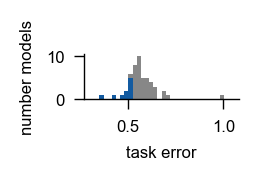

In [8]:
values, edges = np.histogram(task_error.values[: int(0.2 * len(task_error.values))])

width = (edges[1:] - edges[:-1])[0]


fig, ax = dvs.plots.init_plot(figsize=[1.0, 0.3], fontsize=6)
bins = np.linspace(*dvs.plots.get_lims(task_error.values, 0.1), 35)
ax.hist(task_error.values, color=(0.53, 0.53, 0.53, 1.0), bins=bins)
_, _, patches = ax.hist(
    task_error.values[: int(0.2 * len(task_error.values))], color="orange", bins=bins
)

for i, p in enumerate(patches):
    p.set_facecolor(
        np.mean(task_error.colors[: int(0.2 * len(task_error.values))], axis=0)
    )

ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("number models", fontsize=6)
# ax.vlines(0, *ax.get_ylim(), ls="-.")
# ax.vlines(1, *ax.get_ylim(), ls="-.")

# fig, cbar = dvs.plots.standalone_colorbar(cmap, norm, label='task error', figsize=[0.05, 0.75], fontsize=5,
#                                           ticks=[0.0, 0.5, 1.0],
#                                           tick_width=0.25, tick_length=1)
# plt.savefig(DIR.parent / f"task_error_cbar_vertical.pdf", bbox_inches="tight", transparent=True)

plt.savefig(directory / "task_error_histogram_with_normalization.pdf", bbox_inches="tight", transparent=True)

In [9]:
average_min_lower_error = None
average_min_upper_error = None
normalize = False

In [10]:
# task error on the original held out validation set, but with average end-point error
with ensemble.sort(
    "min", validation_subwrap=validation_subwrap, loss_name=validation_loss_fn
):
    task_error = ensemble.task_error(
        validation_subwrap=validation_subwrap,
        normalize=normalize,
        loss_name=validation_loss_fn,
        lower_error_bound=average_min_lower_error,
        upper_error_bound=average_min_upper_error
    )

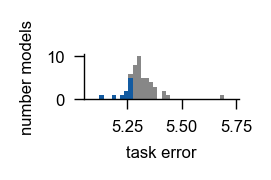

In [11]:
values, edges = np.histogram(task_error.values[: int(0.2 * len(task_error.values))])

width = (edges[1:] - edges[:-1])[0]


fig, ax = dvs.plots.init_plot(figsize=[1.0, 0.3], fontsize=6)
bins = np.linspace(*dvs.plots.get_lims(task_error.values, 0.1), 35)
ax.hist(task_error.values, color=(0.53, 0.53, 0.53, 1.0), bins=bins)
_, _, patches = ax.hist(
    task_error.values[: int(0.2 * len(task_error.values))], color="orange", bins=bins
)

for i, p in enumerate(patches):
    p.set_facecolor(
        np.mean(task_error.colors[: int(0.2 * len(task_error.values))], axis=0)
    )

ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("number models", fontsize=6)
# ax.vlines(0, *ax.get_ylim(), ls="-.")
# ax.vlines(1, *ax.get_ylim(), ls="-.")

# fig, cbar = dvs.plots.standalone_colorbar(cmap, norm, label='task error', figsize=[0.05, 0.75], fontsize=5,
#                                           ticks=[0.0, 0.5, 1.0],
#                                           tick_width=0.25, tick_length=1)
# plt.savefig(DIR.parent / f"task_error_cbar_vertical.pdf", bbox_inches="tight", transparent=True)

plt.savefig(directory / "task_error_histogram_without_normalization.pdf", bbox_inches="tight", transparent=True)

## simple stimuli

In [12]:
nnv = ensemble[0]

In [13]:
nnv.init_movingbar(movingedge_subwrap)

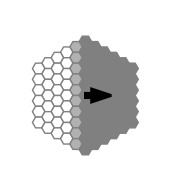

In [14]:
angle = 0
dx, dy = np.exp(np.radians(angle) * 1j).real, np.exp(np.radians(angle) * 1j).imag
fig, ax, _ = dvs.plots.quick_hex_scatter(nnv.movingbar.get(angle=angle, 
                                                           width=80, 
                                                           speed=19.0, 
                                                           intensity=1).cpu().numpy()[230], 
                                         vmin=0, vmax=1, cbar=False, figsize=[1, 1], max_extent=5,
                                        edgecolor="0.5")
plt.arrow(0, 0, dx, dy, color='black', width=0.7)
# plt.savefig(dvs.figure_dir / DIR / "movingbar_f2b_on_cartoon.pdf", bbox_inches="tight", transparent=True)

### responses to simple stimuli

In [15]:
ensemble.init_movingbar(subwrap=movingedge_subwrap)

In [16]:
model_responses = []

for nnv in ensemble.values():
    model_responses.append(nnv.movingbar.response("T4a", speed=13, width=80, intensity=1, angle=[60]))
    model_responses.append(nnv.movingbar.response("T4b", speed=13, width=80, intensity=1, angle=[60]))
    model_responses.append(nnv.movingbar.response("T4c", speed=13, width=80, intensity=1, angle=[60]))
    model_responses.append(nnv.movingbar.response("T4d", speed=13, width=80, intensity=1, angle=[60]))
    model_responses.append(nnv.movingbar.response("T5a", speed=13, width=80, intensity=0, angle=[60]))
    model_responses.append(nnv.movingbar.response("T5b", speed=13, width=80, intensity=0, angle=[60]))
    model_responses.append(nnv.movingbar.response("T5c", speed=13, width=80, intensity=0, angle=[60]))
    model_responses.append(nnv.movingbar.response("T5d", speed=13, width=80, intensity=0, angle=[60]))


model_responses = np.array(model_responses)
model_responses= model_responses.reshape(model_responses.shape[0], 1, model_responses.shape[-1])

In [17]:
model_responses = (model_responses - np.nanmean(model_responses, axis=2, keepdims=True)) / np.nanstd(model_responses, axis=2, keepdims=True)

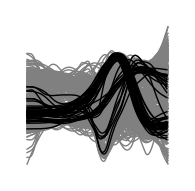

In [18]:
fig, ax = dvs.plots.init_plot(figsize=[1, 1], fontsize=6)
dvs.plots.rm_spines(ax)
for i in range(model_responses.shape[1]):
    resp = model_responses[:, i]
    _ = ax.plot(resp.T, '0.5', lw=0.5, zorder=0)
    _ = ax.plot(resp[2::8].T, 'k', lw=0.5, zorder=1)
plt.savefig(directory / f"synthetic_stimuli_response_schematic.pdf", bbox_inches="tight", transparent=True)

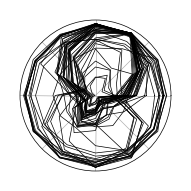

In [19]:
colors = np.array([0, 0, 0, 1]).repeat(50).reshape(4, 50).T
fig, ax = ensemble.motion_tuning(
    "T4c",
    legend=False,
    colors=colors,
    figsize=[1, 1],
    linewidth=0.25,
    zorder=100,
    alpha=1,
    subwrap=movingedge_subwrap
)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.setp(ax.spines.values(), color="k", linewidth=0.25)
ax.grid(True, linewidth=0.25, zorder=0)
plt.savefig(directory / f"synthetic_stimuli_response_tuning_mixed.pdf", bbox_inches="tight", transparent=True)

### statistics of responses to simple stimuli

In [20]:
movingedge_subwrap

'original_validation_v2/epe_based/moving_edges'

In [21]:
ensemble._initialized["movingbar"] = ""

In [22]:
ensemble.init_movingbar(movingedge_subwrap)

In [23]:
with ensemble.model_ratio(best=0.2):
    dsis, node_types = ensemble.dsis(subwrap=movingedge_subwrap, intensity=1)

In [24]:
indices = [
    i
    for i, nt in enumerate(node_types)
    if nt in ["T4a", "T4b", "T4c", "T4d", "T5a", "T5b", "T5c", "T5d"]
]

In [25]:
dsis = dsis[:, indices]
node_types = node_types[indices]

(<Figure size 200x200 with 1 Axes>,
 <AxesSubplot:>,
 array([[0.        , 0.26666667, 0.10588235, 1.        ]]))

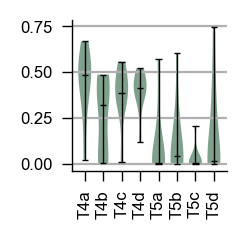

In [26]:
ensemble.dsi_violins(subwrap=movingedge_subwrap, 
                     dsis=dsis, 
                     node_types=["T4a", "T4b", "T4c", "T4d", "T5a", "T5b", "T5c", "T5d"],
                     figsize=[1, 1])

## naturalistic stimuli

In [27]:
ensemble.init_augmented_sintel(dt=1/100)

In [28]:
nnv = ensemble[0]

In [29]:
nnv.augmented_sintel.dt = 1/100

In [30]:
stimulus = nnv.augmented_sintel.get(sequence=1, flip_ax='None', n_rot=0)

In [31]:
stimulus = stimulus[~torch.isnan(stimulus).any(axis=1)].cpu().numpy()

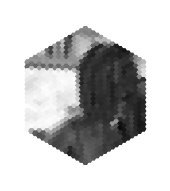

In [32]:
dvs.plots.quick_hex_scatter(stimulus[0], figsize=[1, 1], cbar=False, vmin=0, vmax=1, frame=False)

plt.savefig(directory / f"natural_stimuli_schematic.pdf", bbox_inches="tight", transparent=True)

### responses to naturalistic stimuli

In [33]:
model_responses = []

for nnv in ensemble.values():
    model_responses.append(nnv.augmented_sintel.response("T4c", sequence=1, flip_ax=0, n_rot=0)[int(0.25/(1/100)):])
    
model_responses = np.array(model_responses)

In [34]:
model_responses = (model_responses - np.nanmean(model_responses, axis=1, keepdims=True)) / np.nanstd(model_responses, axis=1, keepdims=True)

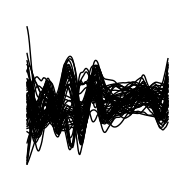

In [35]:
fig, ax = dvs.plots.init_plot(figsize=[1, 1], fontsize=6)
dvs.plots.rm_spines(ax)
ax.plot(model_responses.T, 'k', lw=0.5)
# ax.set_ylabel('responses', fontsize=6, labelpad=-6)
# ax.set_xlabel('time', fontsize=6, labelpad=-6)
plt.savefig(directory  / f"natural_stimuli_response_schematic.pdf", bbox_inches="tight", transparent=True)

### umap and cluster models

# b - predicted strengths of on and off selectivity across best task-performing models

In [37]:
ratio = 0.2

In [38]:
nnv = ensemble[0]
nnv.init_flashes()

## stimuli

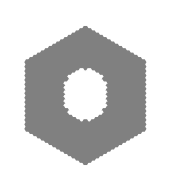

In [39]:
angle = 0
dx, dy = np.exp(np.radians(angle) * 1j).real, np.exp(np.radians(angle) * 1j).imag
fig, ax, _ = dvs.plots.quick_hex_scatter(nnv.flashes_dataset.get(1, 6).cpu().numpy()[240], 
                                         vmin=0, vmax=1, cbar=False, figsize=[1, 1], max_extent=15,
                                         edgecolor=None, frame=False)
# plt.arrow(0, 0, dx, dy, color='black', width=0.7)
ax.patch.set_alpha(0)
# plt.savefig(directory / "flash_stimulus_on.pdf", bbox_inches="tight", transparent=True)

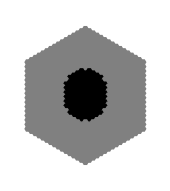

In [40]:
angle = 0
dx, dy = np.exp(np.radians(angle) * 1j).real, np.exp(np.radians(angle) * 1j).imag
fig, ax, _ = dvs.plots.quick_hex_scatter(nnv.flashes_dataset.get(0, 6).cpu().numpy()[240], 
                                         vmin=0, vmax=1, cbar=False, figsize=[1, 1], max_extent=15,
                                        edgecolor=None)
# plt.arrow(0, 0, dx, dy, color='black', width=0.7)
ax.patch.set_alpha(0)
# plt.savefig(directory / "flash_stimulus_off.pdf", bbox_inches="tight", transparent=True)

## flash response index

In [30]:
ensemble.init_flashes(subwrap=flash_subwrap)

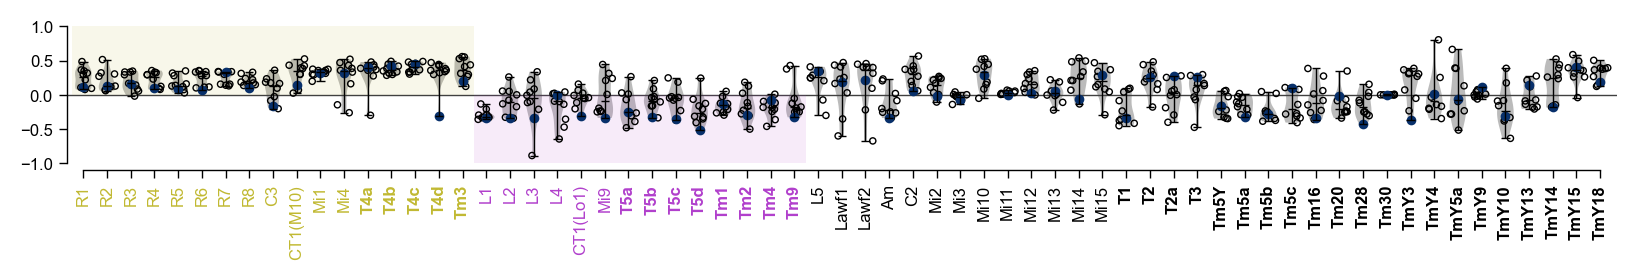

In [41]:
from matplotlib.patches import Rectangle

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.fris_paper_figure(subwrap=flash_subwrap,
                                         cmap=plt.cm.Greys_r,
                                         cstart=100,
                                         validation_subwrap=validation_subwrap,
                                         scatter_alpha=1,
                                         scatter_linewidth=0.5,
                                         sorted_type_list=dvs.utils.nodes_edges_utils.nodes_list_sorting_on_off_unknown(),
                                        figsize=[10, 1],
                                        ylim=(-1.1, 1.1))
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1Lo1", "CT1(Lo1)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1M10", "CT1(M10)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "TmY17", "TmY18")

    ymin, ymax= 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["R1", "Tm3"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON_FR, alpha=0.1)
    ax.add_patch(rect)

    ymin, ymax= 0, -1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["L1", "Tm9"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF_FR, alpha=0.1)
    ax.add_patch(rect)
    
# plt.savefig(directory / f"flash_response_index_20_percent_shaded.pdf", bbox_inches="tight", pad_inches=0, transparent=True)

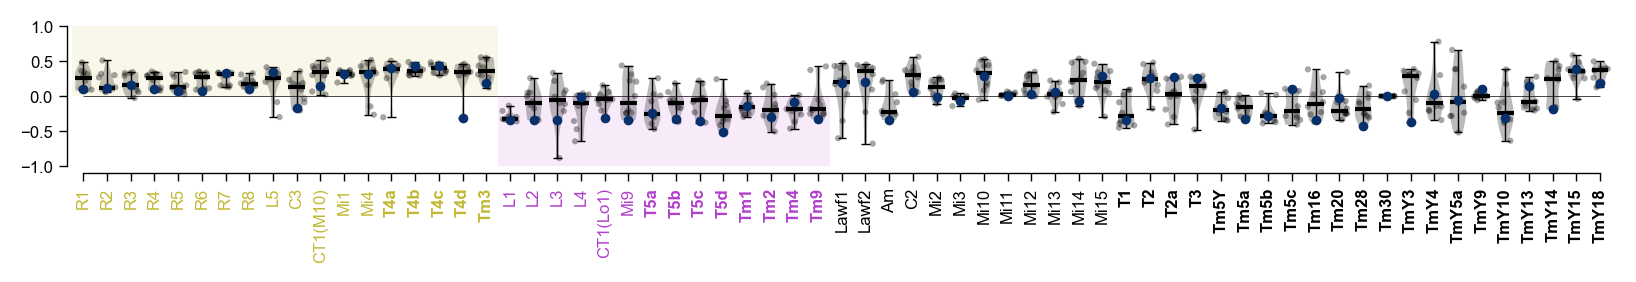

In [31]:
from matplotlib.patches import Rectangle

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.fris_paper_figure(subwrap=flash_subwrap,
                                         cmap=plt.cm.Greys_r,
                                         cstart=100,
                                         validation_subwrap=validation_subwrap,
                                         sorted_type_list=dvs.utils.nodes_edges_utils.nodes_list_sorting_on_off_unknown(),
                                        figsize=[10, 1],
                                        ylim=(-1.1, 1.1),
                                        scatter_edge_width=1,
                                        scatter_best_edge_width=0.75,
                                        scatter_edge_color="none",
                                        scatter_face_color="k",
                                        scatter_alpha=0.35,
                                        scatter_best_alpha=1.0,
                                        scatter_all_marker="o",
                                        scatter_best_marker="o",
                                        scatter_best_color=None,
                                         mean_median_linewidth=1.5,
                                         mean_median_color="k", #"#FF7276", #"white",
                                         mean_median_bar_length = 1.0
                                        )
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1Lo1", "CT1(Lo1)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1M10", "CT1(M10)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "TmY17", "TmY18")

    ymin, ymax= 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["R1", "Tm3"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON_FR, alpha=0.1)
    ax.add_patch(rect)

    ymin, ymax= 0, -1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["L1", "Tm9"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF_FR, alpha=0.1)
    ax.add_patch(rect)
    
# plt.savefig(directory / f"flash_response_index_20_percent_shaded_highlighted_median_other_zorder.pdf", bbox_inches="tight", pad_inches=0, transparent=True)

In [ ]:
from matplotlib.patches import Rectangle

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.fris_paper_figure(subwrap=flash_subwrap,
                                         cmap=plt.cm.Greys_r,
                                         cstart=100,
                                         validation_subwrap=validation_subwrap,
                                         sorted_type_list=dvs.utils.nodes_edges_utils.nodes_list_sorting_on_off_unknown(),
                                        figsize=[10, 1],
                                        ylim=(-1.1, 1.1),
                                        scatter_edge_width=1,
                                        scatter_best_edge_width=0.75,
                                        scatter_edge_color="none",
                                        scatter_face_color="k",
                                        scatter_alpha=0.35,
                                        scatter_best_alpha=1.0,
                                        scatter_all_marker="o",
                                        scatter_best_marker="o",
                                        scatter_best_color=None,
                                         mean_median_linewidth=1.5,
                                         mean_median_color="k", #"#FF7276", #"white",
                                         mean_median_bar_length = 1.0
                                        )
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1Lo1", "CT1(Lo1)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1M10", "CT1(M10)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "TmY17", "TmY18")

    ymin, ymax= 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["R1", "Tm3"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON_FR, alpha=0.1)
    ax.add_patch(rect)

    ymin, ymax= 0, -1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["L1", "Tm9"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF_FR, alpha=0.1)
    ax.add_patch(rect)

In [22]:
mpl.rcParams['figure.dpi'] =300

## super slim

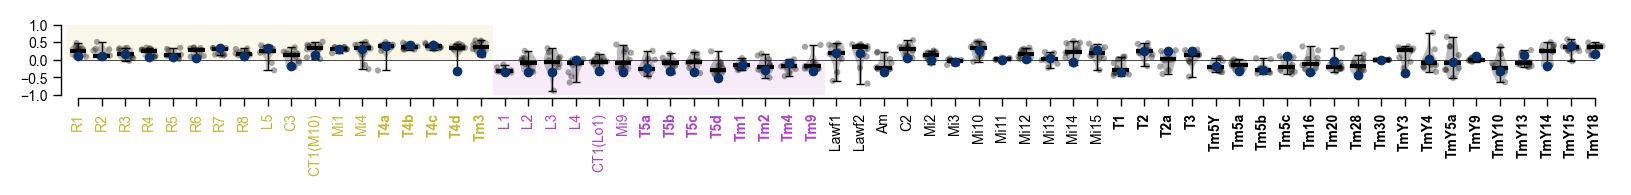

In [8]:
from matplotlib.patches import Rectangle

with ensemble.model_ratio(best=0.2):
    fig, ax = ensemble.fris_paper_figure(subwrap=flash_subwrap,
                                         cmap=plt.cm.Greys_r,
                                         cstart=100,
                                         validation_subwrap=validation_subwrap,
                                         sorted_type_list=dvs.utils.nodes_edges_utils.nodes_list_sorting_on_off_unknown(),
                                        figsize=[10, 0.5],
                                        ylim=(-1.1, 1.1),
                                        scatter_edge_width=1,
                                        scatter_best_edge_width=0.75,
                                        scatter_edge_color="none",
                                        scatter_face_color="k",
                                        scatter_alpha=0.35,
                                        scatter_best_alpha=1.0,
                                        scatter_all_marker="o",
                                        scatter_best_marker="o",
                                        scatter_best_color=None,
                                         mean_median_linewidth=1.5,
                                         mean_median_color="k", #"#FF7276", #"white",
                                         mean_median_bar_length = 1.0,
                                         fontsize=5
                                        )
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1Lo1", "CT1(Lo1)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1M10", "CT1(M10)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "TmY17", "TmY18")

    ymin, ymax= 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["R1", "Tm3"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON_FR, alpha=0.1)
    ax.add_patch(rect)

    ymin, ymax= 0, -1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["L1", "Tm9"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF_FR, alpha=0.1)
    ax.add_patch(rect)
    
plt.savefig(directory / f"flash_response_index_20_percent_shaded_highlighted_median_other_zorder_slim.pdf", bbox_inches="tight", pad_inches=0, transparent=True)

In [9]:
directory

PosixPath('/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/data/figures/manuscript/figure_02_simple_stimuli_responses/assets/links')

## split into known / uncategorized

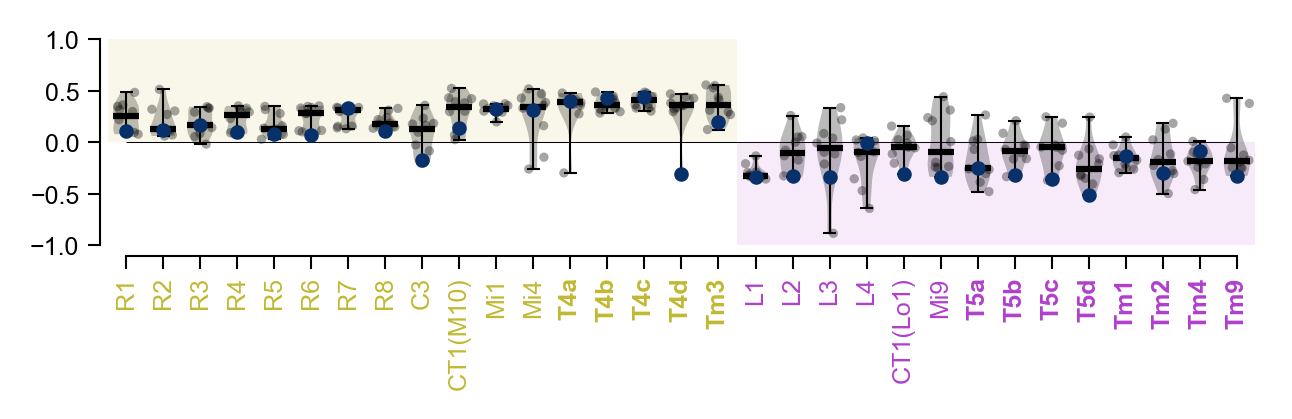

In [29]:
from matplotlib.patches import Rectangle

with ensemble.model_ratio(best=0.2):
    fris, node_type = ensemble.fris(6, subwrap=flash_subwrap)
    known_types = [nt for nt in node_type if nt in list(dvs.utils.groundtruth_utils.known_preferred_contrasts.keys())]
    sorted_type_list = [nt for nt in dvs.utils.nodes_edges_utils.nodes_list_sorting_on_off_unknown() if nt in known_types]
    cfris = dvs.utils.nodes_edges_utils.CellTypeArray(fris, cell_types=node_type)
    fig, ax = ensemble.fris_paper_figure(subwrap=flash_subwrap,
                                         cmap=plt.cm.Greys_r,
                                         cstart=100,
                                         validation_subwrap=validation_subwrap,
                                         sorted_type_list=sorted_type_list,
                                        figsize=[5, 1],
                                        ylim=(-1.1, 1.1),
                                        scatter_edge_width=1,
                                        scatter_best_edge_width=0.75,
                                        scatter_edge_color="none",
                                        scatter_face_color="k",
                                        scatter_alpha=0.35,
                                        scatter_best_alpha=1.0,
                                        scatter_all_marker="o",
                                        scatter_best_marker="o",
                                        scatter_best_color=None,
                                         mean_median_linewidth=1.5,
                                         mean_median_color="k", #"#FF7276", #"white",
                                         mean_median_bar_length = 1.0,
                                         fris=cfris[known_types],
                                         node_types=known_types
                                        )
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1Lo1", "CT1(Lo1)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1M10", "CT1(M10)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "TmY17", "TmY18")

    ymin, ymax= 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["R1", "Tm3"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON_FR, alpha=0.1)
    ax.add_patch(rect)

    ymin, ymax= 0, -1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["L1", "Tm9"]]
    # to place in between ticks
    xmin -= 1/2
    xmax += 1/2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF_FR, alpha=0.1)
    ax.add_patch(rect)
plt.savefig(directory / f"flash_response_index_twee_print_known.pdf", bbox_inches="tight", pad_inches=0, transparent=True)    

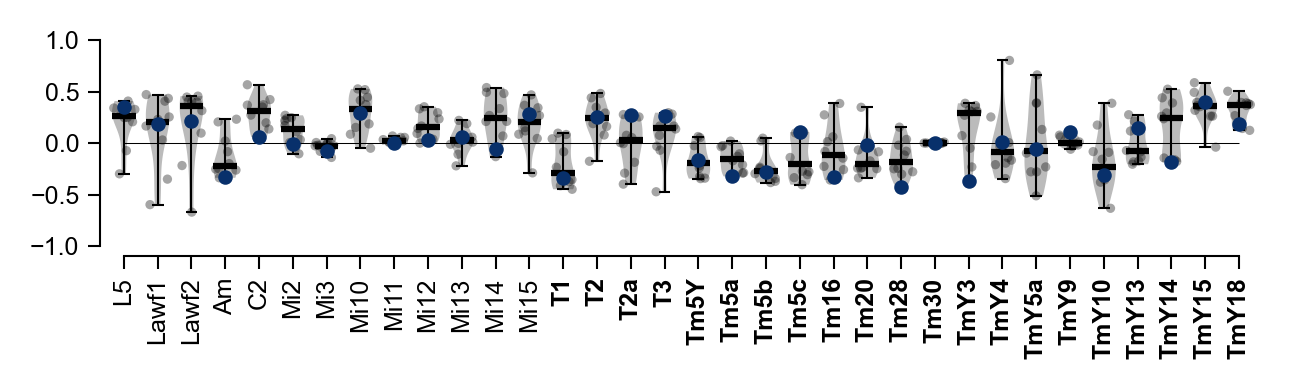

In [30]:
from matplotlib.patches import Rectangle

with ensemble.model_ratio(best=0.2):
    fris, node_type = ensemble.fris(6, subwrap=flash_subwrap)
    unknown_types = [nt for nt in node_type if nt not in list(dvs.utils.groundtruth_utils.known_preferred_contrasts.keys())]
    sorted_type_list = [nt for nt in dvs.utils.nodes_edges_utils.nodes_list_sorting_on_off_unknown() if nt in unknown_types]
    cfris = dvs.utils.nodes_edges_utils.CellTypeArray(fris, cell_types=node_type)
    fig, ax = ensemble.fris_paper_figure(subwrap=flash_subwrap,
                                         cmap=plt.cm.Greys_r,
                                         cstart=100,
                                         validation_subwrap=validation_subwrap,
                                         sorted_type_list=sorted_type_list,
                                        figsize=[5, 1],
                                        ylim=(-1.1, 1.1),
                                        scatter_edge_width=1,
                                        scatter_best_edge_width=0.75,
                                        scatter_edge_color="none",
                                        scatter_face_color="k",
                                        scatter_alpha=0.35,
                                        scatter_best_alpha=1.0,
                                        scatter_all_marker="o",
                                        scatter_best_marker="o",
                                        scatter_best_color=None,
                                         mean_median_linewidth=1.5,
                                         mean_median_color="k", #"#FF7276", #"white",
                                         mean_median_bar_length = 1.0,
                                         fris=cfris[unknown_types],
                                         node_types=unknown_types
                                        )
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1Lo1", "CT1(Lo1)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "CT1M10", "CT1(M10)")
    dvs.plots.plt_utils.patch_ax_texts(ax, "TmY17", "TmY18")

#     ymin, ymax= 0, 1
#     # to get locations of left most and right most T4 subtype ticks
#     xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["R1", "Tm3"]]
#     # to place in between ticks
#     xmin -= 1/2
#     xmax += 1/2
#     xy = (xmin, ymin)
#     width = xmax - xmin
#     height = ymax
#     rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON_FR, alpha=0.1)
#     ax.add_patch(rect)

#     ymin, ymax= 0, -1
#     # to get locations of left most and right most T4 subtype ticks
#     xmin, xmax = [p.get_position()[0] for p in ax.get_xticklabels() if p.get_text() in ["L1", "Tm9"]]
#     # to place in between ticks
#     xmin -= 1/2
#     xmax += 1/2
#     xy = (xmin, ymin)
#     width = xmax - xmin
#     height = ymax
#     rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF_FR, alpha=0.1)
#     ax.add_patch(rect)
plt.savefig(directory / f"flash_response_index_twee_print_unknown.pdf", bbox_inches="tight", pad_inches=0, transparent=True)    

## two groups: known ON known OFF unknown

(<Figure size 720x172.8 with 2 Axes>, [<AxesSubplot: >, <AxesSubplot: >], 33)

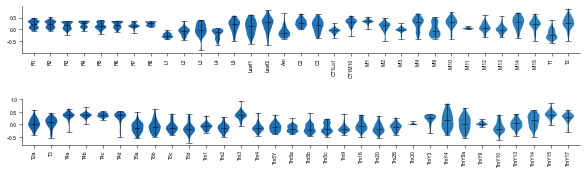

In [7]:
dvs.plots.plots.multi_row_violins(node_type, fris, 30)

In [11]:
dvs.utils.groundtruth_utils.known_preferred_contrasts

{'R1': 1,
 'R2': 1,
 'R3': 1,
 'R4': 1,
 'R5': 1,
 'R6': 1,
 'R7': 1,
 'R8': 1,
 'L1': -1,
 'L2': -1,
 'L3': -1,
 'L4': -1,
 'C3': 1,
 'CT1Lo1': -1,
 'CT1M10': 1,
 'Mi1': 1,
 'Mi4': 1,
 'Mi9': -1,
 'T4a': 1,
 'T4b': 1,
 'T4c': 1,
 'T4d': 1,
 'T5a': -1,
 'T5b': -1,
 'T5c': -1,
 'T5d': -1,
 'Tm1': -1,
 'Tm2': -1,
 'Tm3': 1,
 'Tm4': -1,
 'Tm9': -1}

In [12]:
from dvs.utils.nodes_edges_utils import CellTypeArray

In [13]:
fris = CellTypeArray(fris, ctome=ensemble.ctome)

In [17]:
known_on = fris[np.array([k for k, v in dvs.utils.groundtruth_utils.known_preferred_contrasts.items() if v == 1])]

In [20]:
known_off = fris[np.array([k for k, v in dvs.utils.groundtruth_utils.known_preferred_contrasts.items() if v == -1])]

In [21]:
unknown = fris[np.array([k for k in fris if k not in  dvs.utils.groundtruth_utils.known_preferred_contrasts])]

In [30]:
fri_simple = [[known_on.flatten(), known_off.flatten(), unknown.flatten()]]

In [35]:
dvs.utils.color_utils.OFF_FR

'#b140cc'

In [36]:
dvs.plots.violin_groups_v3??

Text(0, 0.5, 'flash response index')

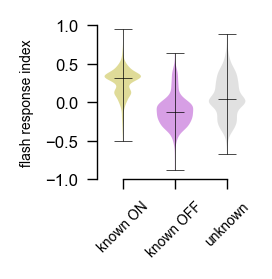

In [43]:
fig, ax, _ = dvs.plots.violin_groups_v3(fri_simple, figsize=[1, 1], colors=[dvs.utils.color_utils.ON_FR, dvs.utils.color_utils.OFF_FR, "#c5c5c5"], color_by="random_variables")
ax.set_ylim(-1, 1)
dvs.plots.trim_axis(ax)
ax.set_xticklabels(["known ON", "known OFF", "unknown"], rotation=45, fontsize=5)
ax.set_ylabel("flash response index", fontsize=5)

## Supplement

In [176]:
dsis, node_types = ensemble.dsis(movingedge_subwrap, [1])

> /groups/turaga/home/lappalainenj/FlyVis/dvs-sim/dvs/analysis/ensemble_views.py(1634)dsis()
   1632         pdb.set_trace()
   1633         # in case a context is provided that filters models
-> 1634         dsis = dsis[:, self._model_index]
   1635 
   1636         return dsis.filled(np.nan)[:].squeeze(), dsis.cell_types

ipdb> dsis.shape
(1, 50, 1, 1, 1, 1, 65)
ipdb> dsis[:, np.arange(100)]
*** IndexError: index 50 is out of bounds for axis 1 with size 50
ipdb> c


In [182]:
ensemble.init_moving_edge_responses(movingedge_subwrap, reset=True)

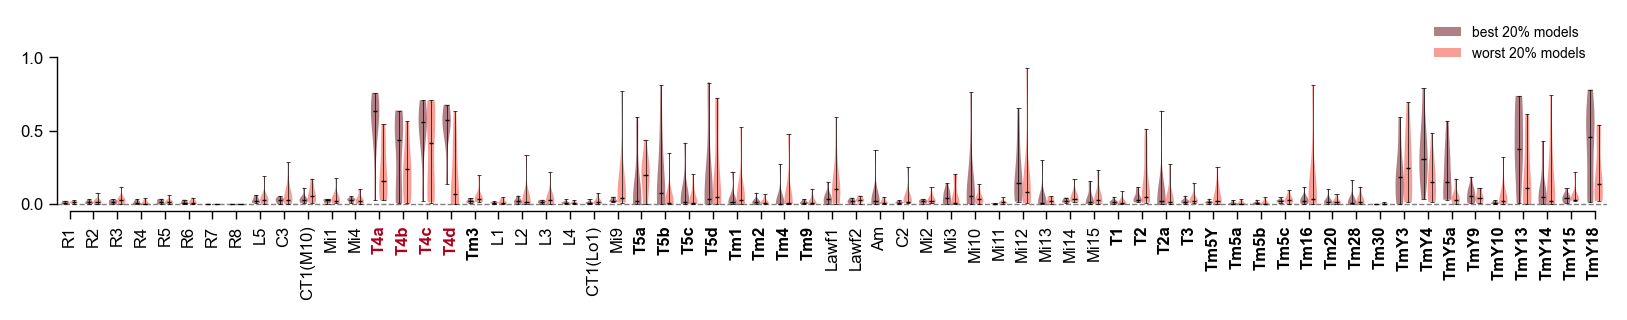

In [178]:
fig, ax = ensemble.dsis_paper_si([1], best_ratio=0.2, worst_ratio=0.2, subwrap=movingedge_subwrap)
fig.savefig(dvs.si_extended_figure_02_dsi_fri / "dsi_on.pdf", transparent=True, bbox_inches="tight", pad_inches=0)

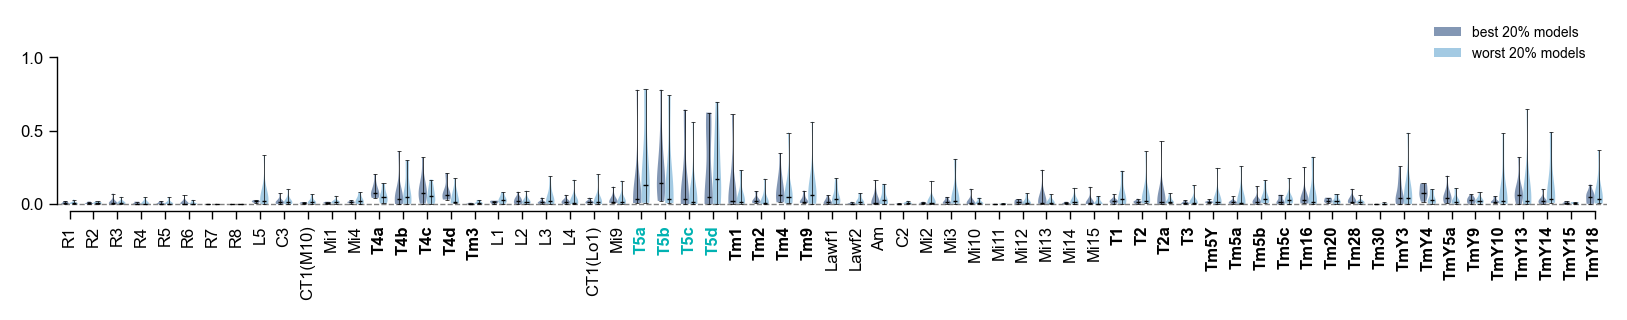

In [183]:
ensemble.dsis_paper_si([0], best_ratio=0.2, worst_ratio=0.2, subwrap=movingedge_subwrap)
fig.savefig(dvs.si_extended_figure_02_dsi_fri / "dsi_off.pdf", transparent=True, bbox_inches="tight", pad_inches=0)

# c - predicted strengths of on-motion and off-motion selectivity across best task-performing models

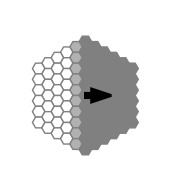

In [44]:
angle = 0
dx, dy = np.exp(np.radians(angle) * 1j).real, np.exp(np.radians(angle) * 1j).imag
fig, ax, _ = dvs.plots.quick_hex_scatter(nnv.movingbar.get(angle=angle, 
                                                           width=80, 
                                                           speed=19.0, 
                                                           intensity=1).cpu().numpy()[240], 
                                         vmin=0, vmax=1, cbar=False, figsize=[1, 1], max_extent=5,
                                        edgecolor="0.5")
plt.arrow(0, 0, dx, dy, color='black', width=0.7)
# plt.savefig(dvs.figure_dir / DIR / "movingbar_f2b_on_cartoon.pdf", bbox_inches="tight", transparent=True)

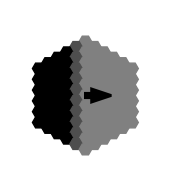

In [45]:
angle = 0
dx, dy = np.exp(np.radians(angle) * 1j).real, np.exp(np.radians(angle) * 1j).imag
fig, ax, _ = dvs.plots.quick_hex_scatter(nnv.movingbar.get(angle=angle, 
                                                           width=80, 
                                                           speed=19.0, 
                                                           intensity=0).cpu().numpy()[240], 
                                         vmin=0, vmax=1, cbar=False, figsize=[1, 1], max_extent=5,
                                        edgecolor=None)
plt.arrow(0, 0, dx, dy, color='black', width=0.7)
# plt.savefig(dvs.figure_dir / DIR / "movingbar_f2b_off_cartoon.pdf", bbox_inches="tight", transparent=True)

In [32]:
ensemble.init_moving_edge_responses(movingedge_subwrap)

In [10]:
peak = ensemble.moving_edge_response_view.rectify().transpose(1, 0, 2, 3, 4, 5, 6).peak()

In [14]:
best_model_mask = ensemble.best_models_mask(0.2)

In [32]:
Zpeak = peak.angular(dim=0)
dsis = dsi_from_peak_angular_responses(
    Zpeak[:],
    angle_axis=0,
    width_axis=2,
    intensity_axis=3,
    speed_axis=4,
    average=False,
)

In [35]:
dsis.shape

(50, 2, 6, 65)

In [25]:
[1e-5][:]

[1e-05]

In [37]:
dsis = Zpeak.dsi(average=False)

In [42]:
index = dsis.arg_df.index.values

In [43]:
dsis.arg_df

,angle,width,intensity,t_stim,speed
0,0,80,0,3.394397,2.4
1,0,80,0,1.697198,4.8
2,0,80,0,0.839851,9.7
3,0,80,0,0.626658,13.0
4,0,80,0,0.428766,19.0
...,...,...,...,...,...
139,330,80,1,1.697198,4.8
140,330,80,1,0.839851,9.7
141,330,80,1,0.626658,13.0
142,330,80,1,0.428766,19.0


In [47]:
angles = dsis.arg_df.angle.unique()
intensity = dsis.arg_df.intensity.unique()
width = dsis.arg_df.width.unique()
speed = dsis.arg_df.speed.unique()

In [49]:
x = 44

In [50]:
reshaped_index = index.reshape(len(angles), len(width), len(intensity), len(speed))

In [51]:
np.where(reshaped_index == x)

(array([3]), array([0]), array([1]), array([2]))

In [66]:
mask = (dsis.arg_df.intensity.unique() == [0])

In [67]:
mask

array([ True, False])

In [62]:
dsis.shape

(1, 50, 1, 2, 6, 1, 65)

In [107]:
peak = (
    ensemble.moving_edge_response_view.rectify()
    .transpose(1, 0, 2, 3, 4, 5, 6)
    .peak()
)
Zpeak = peak.angular(dim=0)  # type: MovingEdgeResponseView

dsis = Zpeak.dsi(average=True)

In [108]:
dsis.shape

(1, 50, 1, 2, 1, 1, 65)

In [114]:
ensemble.preferred_directions(movingedge_subwrap, 1)

(array([[ 6.08996132e+01,  3.38691574e+01,  5.30183937e+01, ...,
          0.00000000e+00, -1.82640792e+01,  6.98266783e+01],
        [-1.60074973e+01, -1.60129516e+01, -1.34653002e+02, ...,
         -1.74587666e+02, -1.72726043e+01,  9.40991746e-01],
        [-1.21979038e+02, -1.12663701e+02, -1.25867645e+02, ...,
         -1.19189693e+02,  4.70151428e+00, -1.03550282e+01],
        ...,
        [-1.44393712e+02, -1.44833695e+02,  9.03929196e+01, ...,
          0.00000000e+00, -1.11637609e+02, -1.46172440e+01],
        [ 1.13152642e+02,  1.13151070e+02, -1.27849070e+02, ...,
          1.11837825e+02,  1.55237637e+02,  1.60340529e+02],
        [-1.11803692e-08, -2.06825011e-08, -9.04421236e-09, ...,
          9.32022487e+01, -1.39995990e+01, -1.07482030e+01]]),
 array(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'L1', 'L2', 'L3',
        'L4', 'L5', 'Lawf1', 'Lawf2', 'Am', 'C2', 'C3', 'CT1Lo1', 'CT1M10',
        'Mi1', 'Mi2', 'Mi3', 'Mi4', 'Mi9', 'Mi10', 'Mi11', 'Mi12', 'Mi13',
    

In [103]:
pds = Zpeak.preferred_direction()

In [111]:
np.ma.filled(pds.filled(np.nan), np.nan)

array([[[[[[[-2.04721870e+00, -2.47789647e-01, -5.40762132e-13, ...,
              0.00000000e+00, -6.21558625e-01, -1.49608374e+00]]],


          [[[ 1.06289876e+00,  5.91128312e-01,  9.25345535e-01, ...,
              0.00000000e+00, -3.18768317e-01,  1.21870544e+00]]]]],




        [[[[[-2.56153956e+00, -3.04049151e+00, -2.69812678e+00, ...,
              2.80281534e+00, -1.52449798e+00, -4.86177825e-02]]],


          [[[-2.79383534e-01, -2.79478728e-01, -2.35013823e+00, ...,
             -3.04712960e+00, -3.01463816e-01,  1.64234042e-02]]]]],




        [[[[[-2.92559661e+00,  2.88200578e+00, -2.88283094e+00, ...,
              3.07057221e+00,  1.66978237e+00, -3.13172712e+00]]],


          [[[-2.12893583e+00, -1.96635253e+00, -2.19680482e+00, ...,
             -2.08025258e+00,  8.20569040e-02, -1.80729336e-01]]]]],




        ...,




        [[[[[-2.31785811e+00, -2.11058490e+00,  0.00000000e+00, ...,
              2.36752624e+00,  2.34506993e+00,  2.99762453e+00]]],


     

In [87]:
dsis = ensemble.dsis(movingedge_subwrap, [0, 1])

In [92]:
A = ensemble.wrap.test_dsi_xy[:]

In [94]:
B = dsis[0]

In [98]:
((A - B).sum() / A.size) * 100

2.425375709431774

In [81]:
a.filled(np.nan)[:].squeeze()

array([[3.72541133e-04, 1.26786032e-04, 1.06979184e-04, ...,
        0.00000000e+00, 5.62108965e-02, 1.27469975e-02],
       [4.08930030e-03, 1.55524874e-02, 2.55115399e-02, ...,
        7.14976706e-02, 3.75338300e-02, 3.67539984e-01],
       [2.13369084e-02, 1.25386407e-02, 3.43233631e-02, ...,
        3.82472452e-02, 6.02816416e-02, 5.50713199e-01],
       ...,
       [1.06778644e-02, 8.40068105e-03, 4.36880049e-02, ...,
        0.00000000e+00, 2.37013303e-02, 5.41154430e-01],
       [1.33602875e-02, 1.81821633e-02, 3.44546017e-02, ...,
        1.50174382e-02, 2.78369439e-02, 2.86781554e-02],
       [1.60176397e-07, 1.35747880e-07, 5.99126810e-08, ...,
        2.75932230e-02, 2.18148920e-01, 1.88124116e-01]])

In [23]:
with ensemble.model_ratio(0.2):
    print(type(ensemble._model_index))
ensemble._model_index

<class 'numpy.ndarray'>


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

((<Figure size 2000x200 with 1 Axes>, <Figure size 2000x200 with 1 Axes>),
 (<Axes: >, <Axes: >))

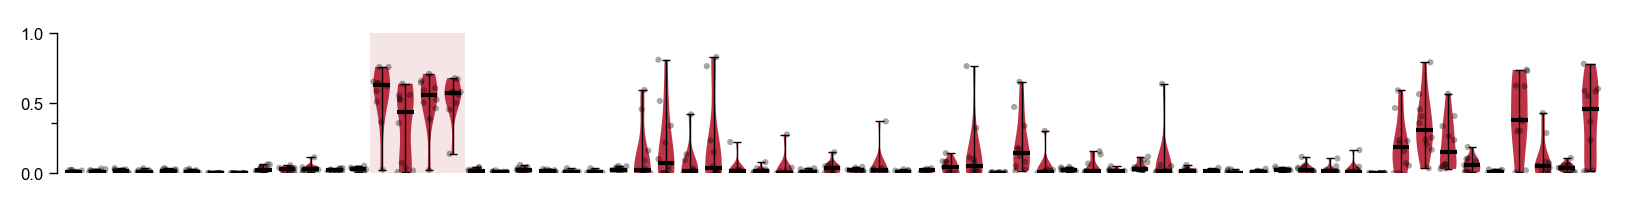

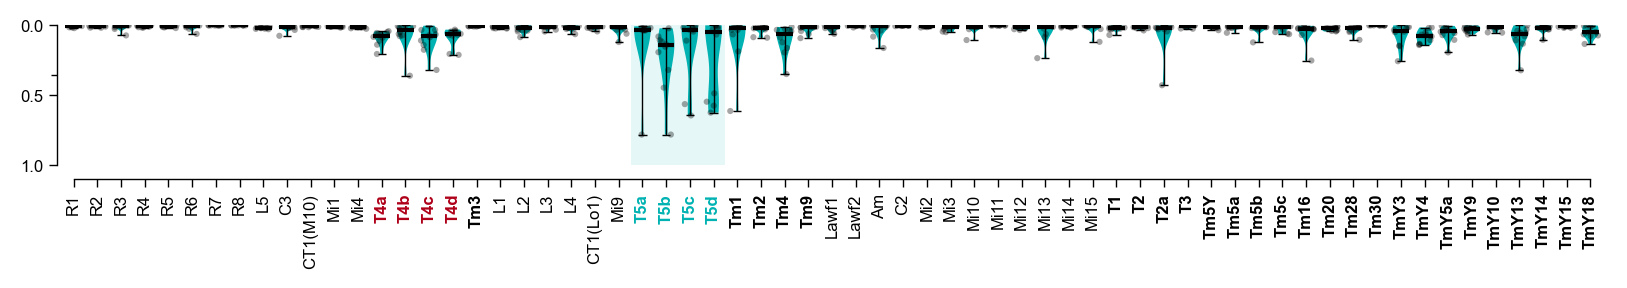

In [29]:
peak.plot_dsis(dsis[:][best_model_mask],
               peak.responses.cell_types,
               ensemble,
               validation_subwrap,
               movingedge_subwrap)

In [12]:
from dvs.datasets.moving_bar import dsi_from_peak_angular_responses

In [8]:
ensemble.init_movingbar(subwrap=movingedge_subwrap)

In [6]:
ratio =0.2

In [85]:
mpl.rcParams['figure.dpi'] = 200

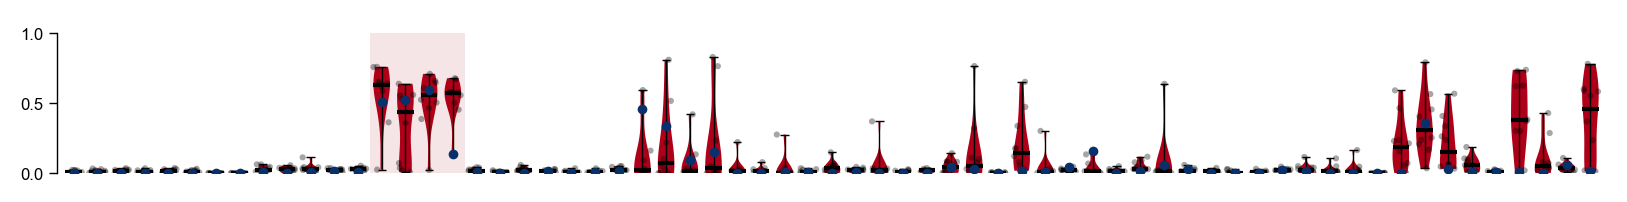

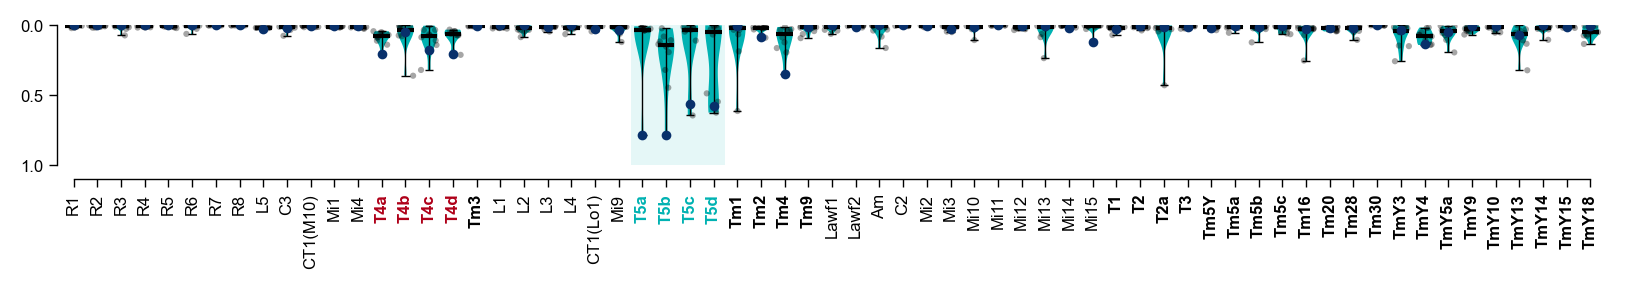

In [7]:
with ensemble.model_ratio(best=ratio):
    figs, axes = ensemble.dsis_stacked_on_off_two_figures(
        scatter_best=True,
        scatter_all=True,
        nonlinearity=True,
        validation_subwrap=validation_subwrap,
        subwrap=movingedge_subwrap,
        scatter_edge_width=1,
        scatter_best_edge_width=0.75,
        scatter_edge_color="none",
        scatter_face_color="k",
        scatter_alpha=0.35,
        scatter_best_alpha=1.0,
        scatter_all_marker="o",
        scatter_best_marker="o",
        scatter_best_color=None,
        mean_median_linewidth=1.5,
        mean_median_color="k", #"#FF7276", #"white",
        mean_median_bar_length = 1.0
    )

    ymin, ymax = 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T4a", "T4d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON, alpha=0.1)
    axes[0].add_patch(rect)

    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T5a", "T5d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF, alpha=0.1)
    axes[1].add_patch(rect)

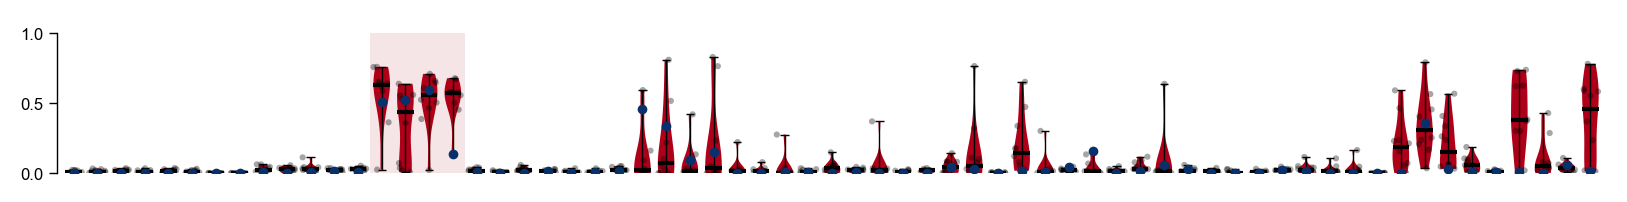

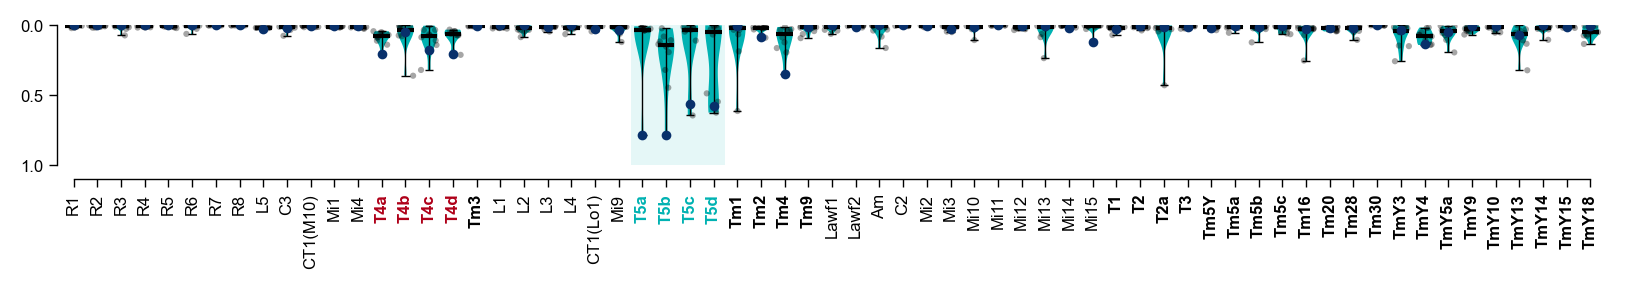

In [86]:
with ensemble.model_ratio(best=ratio):
    figs, axes = ensemble.dsis_stacked_on_off_two_figures(
        scatter_best=True,
        scatter_all=True,
        nonlinearity=True,
        validation_subwrap=validation_subwrap,
        subwrap=movingedge_subwrap,
        scatter_edge_width=1,
        scatter_best_edge_width=0.75,
        scatter_edge_color="none",
        scatter_face_color="k",
        scatter_alpha=0.35,
        scatter_best_alpha=1.0,
        scatter_all_marker="o",
        scatter_best_marker="o",
        scatter_best_color=None,
        mean_median_linewidth=1.5,
        mean_median_color="k", #"#FF7276", #"white",
        mean_median_bar_length = 1.0
    )

    ymin, ymax = 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T4a", "T4d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON, alpha=0.1)
    axes[0].add_patch(rect)

    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T5a", "T5d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF, alpha=0.1)
    axes[1].add_patch(rect)

In [99]:
threshods = dict(both=0.3595418259415197, on=0.40874709176448576, off=0.30637072608962596)

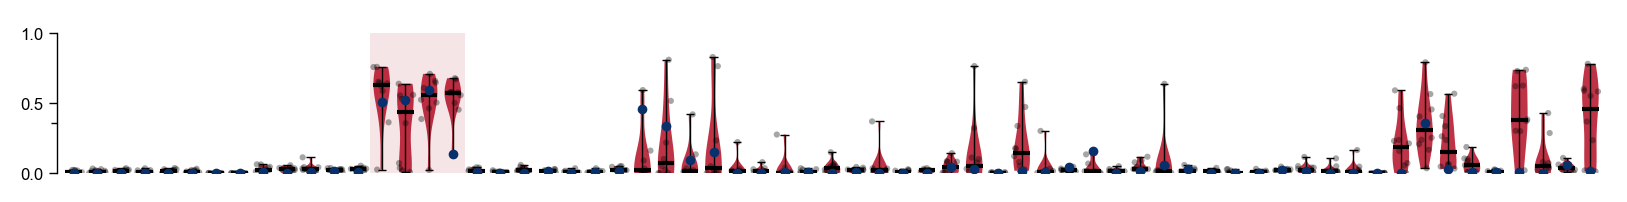

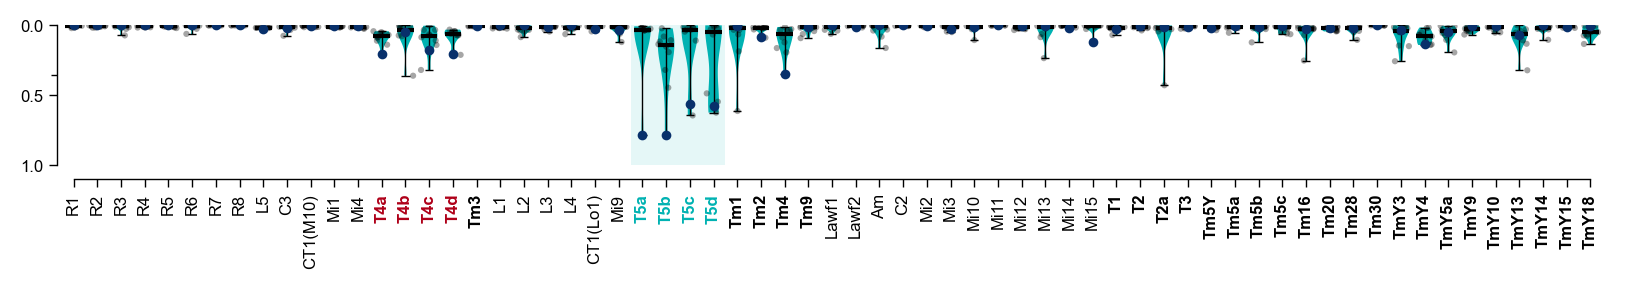

In [100]:
with ensemble.model_ratio(best=ratio):
    figs, axes = ensemble.dsis_stacked_on_off_two_figures(
        scatter_best=True,
        scatter_all=True,
        nonlinearity=True,
        validation_subwrap=validation_subwrap,
        subwrap=movingedge_subwrap,
        scatter_edge_width=1,
        scatter_best_edge_width=0.75,
        scatter_edge_color="none",
        scatter_face_color="k",
        scatter_alpha=0.35,
        scatter_best_alpha=1.0,
        scatter_all_marker="o",
        scatter_best_marker="o",
        scatter_best_color=None,
        mean_median_linewidth=1.5,
        mean_median_color="k", #"#FF7276", #"white",
        mean_median_bar_length = 1.0,
        violin_alphas=[0.8, 1]
    )

    ymin, ymax = 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T4a", "T4d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON, alpha=0.1)
    axes[0].add_patch(rect)

    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T5a", "T5d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF, alpha=0.1)
    axes[1].add_patch(rect)
    
    yticks = [0, 0.3569298612537902, 0.5, 1]
    yticklabels = ["0.0", "0.36", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[1].set_yticks(yticks, yticklabels)
    
    threshold = 0.3569298612537902
#     yticks = [0, threshold, 0.5, 1]
#     yticklabels = ["0.0", "", "0.5", "1.0"]
    yticks = [0,  0.5, 1]
    yticklabels = ["0.0", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[0].set_yticks([threshold], minor=True)
    axes[1].set_yticks(yticks, yticklabels)
    axes[1].set_yticks([threshold], minor=True)
    
    
figs[0].savefig(
    directory / f"dsi_{ratio*100:G}_percent_on_shaded_new_dsi_threshold_ticked.pdf",
    bbox_inches="tight",
    pad_inches=0,
    transparent=True,
)
figs[1].savefig(
    directory / f"dsi_{ratio*100:G}_percent_off_shaded_new_dsi_threshold_ticked.pdf",
    bbox_inches="tight",
    pad_inches=0,
    transparent=True,
)

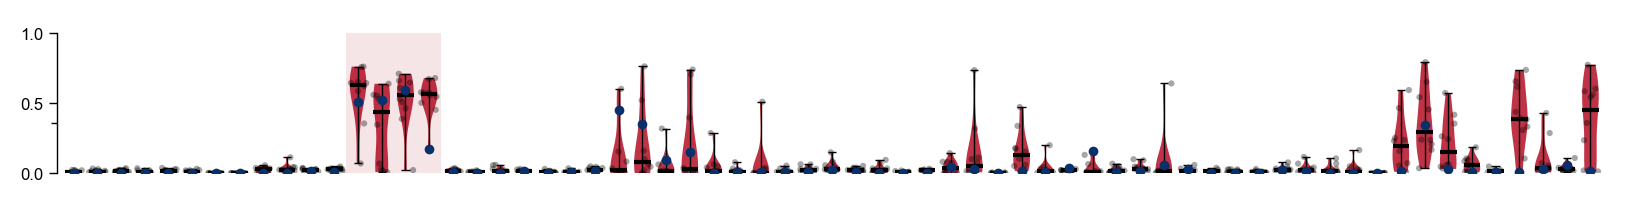

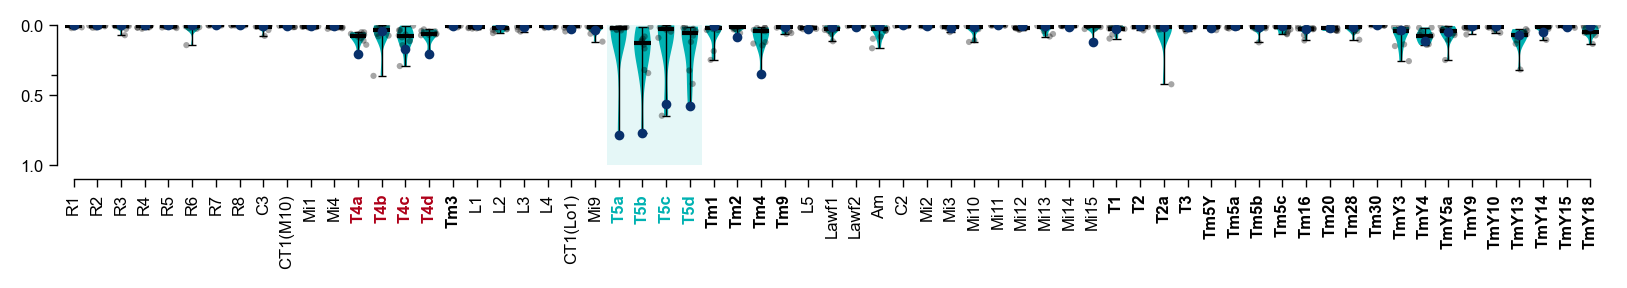

In [12]:
with ensemble.model_ratio(best=ratio):
    figs, axes = ensemble.dsis_stacked_on_off_two_figures(
        scatter_best=True,
        scatter_all=True,
        nonlinearity=False,
        validation_subwrap=validation_subwrap,
        subwrap=movingedge_subwrap,
        scatter_edge_width=1,
        scatter_best_edge_width=0.75,
        scatter_edge_color="none",
        scatter_face_color="k",
        scatter_alpha=0.35,
        scatter_best_alpha=1.0,
        scatter_all_marker="o",
        scatter_best_marker="o",
        scatter_best_color=None,
        mean_median_linewidth=1.5,
        mean_median_color="k", #"#FF7276", #"white",
        mean_median_bar_length = 1.0,
        violin_alphas=[0.8, 1]
    )

    ymin, ymax = 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T4a", "T4d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON, alpha=0.1)
    axes[0].add_patch(rect)

    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T5a", "T5d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF, alpha=0.1)
    axes[1].add_patch(rect)
    
    yticks = [0, 0.3569298612537902, 0.5, 1]
    yticklabels = ["0.0", "0.36", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[1].set_yticks(yticks, yticklabels)
    
    threshold = 0.3569298612537902
#     yticks = [0, threshold, 0.5, 1]
#     yticklabels = ["0.0", "", "0.5", "1.0"]
    yticks = [0,  0.5, 1]
    yticklabels = ["0.0", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[0].set_yticks([threshold], minor=True)
    axes[1].set_yticks(yticks, yticklabels)
    axes[1].set_yticks([threshold], minor=True)
    
    
# figs[0].savefig(
#     directory / f"dsi_{ratio*100:G}_percent_on_shaded_new_dsi_threshold_ticked.pdf",
#     bbox_inches="tight",
#     pad_inches=0,
#     transparent=True,
# )
# figs[1].savefig(
#     directory / f"dsi_{ratio*100:G}_percent_off_shaded_new_dsi_threshold_ticked.pdf",
#     bbox_inches="tight",
#     pad_inches=0,
#     transparent=True,
# )    

In [34]:
ratio = 0.2

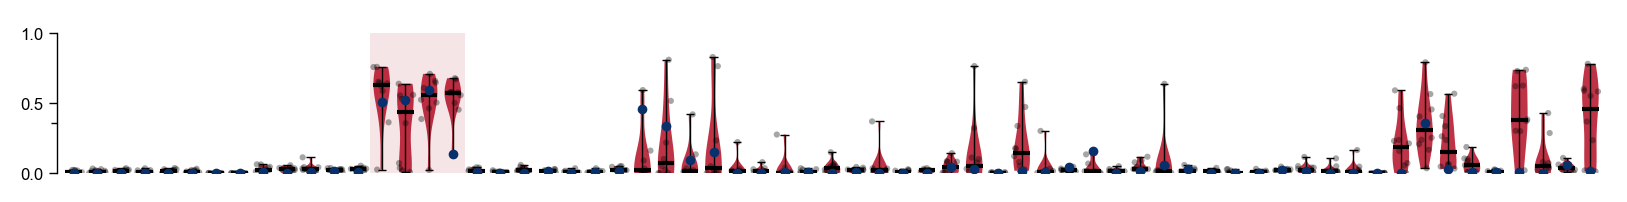

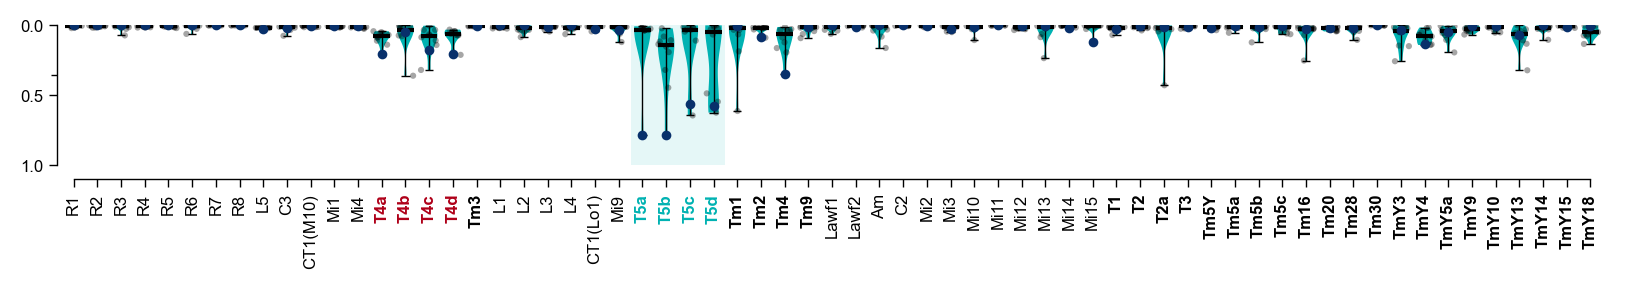

In [35]:
with ensemble.model_ratio(best=ratio):
    figs, axes = ensemble.dsis_stacked_on_off_two_figures(
        scatter_best=True,
        scatter_all=True,
        nonlinearity=True,
        validation_subwrap=validation_subwrap,
        subwrap=movingedge_subwrap,
        scatter_edge_width=1,
        scatter_best_edge_width=0.75,
        scatter_edge_color="none",
        scatter_face_color="k",
        scatter_alpha=0.35,
        scatter_best_alpha=1.0,
        scatter_all_marker="o",
        scatter_best_marker="o",
        scatter_best_color=None,
        mean_median_linewidth=1.5,
        mean_median_color="k", #"#FF7276", #"white",
        mean_median_bar_length = 1.0,
        violin_alphas=[0.8, 1]
    )

    ymin, ymax = 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T4a", "T4d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON, alpha=0.1)
    axes[0].add_patch(rect)

    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T5a", "T5d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF, alpha=0.1)
    axes[1].add_patch(rect)
    
    yticks = [0, 0.3569298612537902, 0.5, 1]
    yticklabels = ["0.0", "0.36", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[1].set_yticks(yticks, yticklabels)
    
    threshold = 0.3569298612537902
#     yticks = [0, threshold, 0.5, 1]
#     yticklabels = ["0.0", "", "0.5", "1.0"]
    yticks = [0,  0.5, 1]
    yticklabels = ["0.0", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[0].set_yticks([threshold], minor=True)
    axes[1].set_yticks(yticks, yticklabels)
    axes[1].set_yticks([threshold], minor=True)
    
    
# figs[0].savefig(
#     directory / f"dsi_{ratio*100:G}_percent_on_shaded_new_dsi_threshold_ticked.pdf",
#     bbox_inches="tight",
#     pad_inches=0,
#     transparent=True,
# )
# figs[1].savefig(
#     directory / f"dsi_{ratio*100:G}_percent_off_shaded_new_dsi_threshold_ticked.pdf",
#     bbox_inches="tight",
#     pad_inches=0,
#     transparent=True,
# )

## super slim

In [10]:
movingedge_subwrap

'original_validation_v2/epe_based/moving_edges'

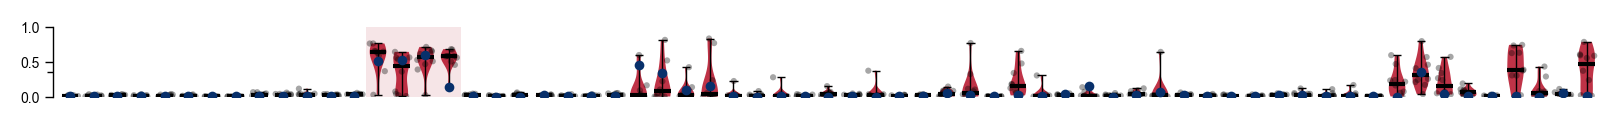

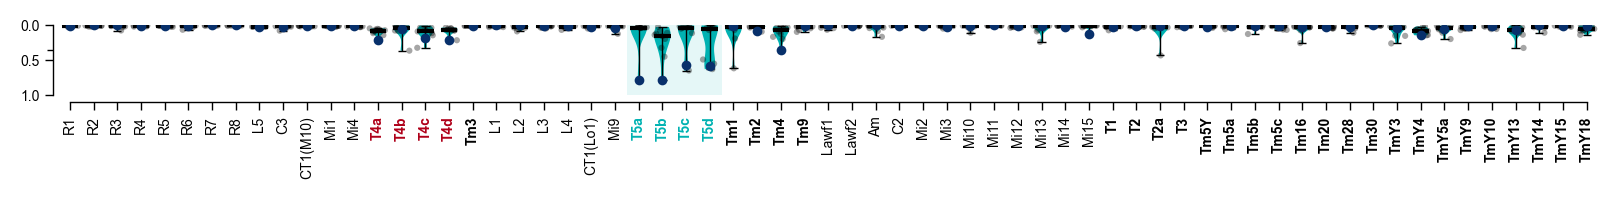

In [14]:
with ensemble.model_ratio(best=0.2):
    figs, axes = ensemble.dsis_stacked_on_off_two_figures(
        scatter_best=True,
        scatter_all=True,
        nonlinearity=True,
        validation_subwrap=validation_subwrap,
        subwrap=movingedge_subwrap,
        scatter_edge_width=1,
        scatter_best_edge_width=0.75,
        scatter_edge_color="none",
        scatter_face_color="k",
        scatter_alpha=0.35,
        scatter_best_alpha=1.0,
        scatter_all_marker="o",
        scatter_best_marker="o",
        scatter_best_color=None,
        mean_median_linewidth=1.5,
        mean_median_color="k", #"#FF7276", #"white",
        mean_median_bar_length = 1.0,
        violin_alphas=[0.8, 1],
        figsize=[10, 0.5],
        fontsize=5
    )

    ymin, ymax = 0, 1
    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T4a", "T4d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.ON, alpha=0.1)
    axes[0].add_patch(rect)

    # to get locations of left most and right most T4 subtype ticks
    xmin, xmax = [
        p.get_position()[0]
        for p in axes[1].get_xticklabels()
        if p.get_text() in ["T5a", "T5d"]
    ]
    # to place in between ticks
    xmin -= 1 / 2
    xmax += 1 / 2
    xy = (xmin, ymin)
    width = xmax - xmin
    height = ymax
    rect = Rectangle(xy, width, height, facecolor=dvs.utils.color_utils.OFF, alpha=0.1)
    axes[1].add_patch(rect)
    
    yticks = [0, 0.3569298612537902, 0.5, 1]
    yticklabels = ["0.0", "0.36", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[1].set_yticks(yticks, yticklabels)
    
    threshold = 0.3569298612537902
#     yticks = [0, threshold, 0.5, 1]
#     yticklabels = ["0.0", "", "0.5", "1.0"]
    yticks = [0,  0.5, 1]
    yticklabels = ["0.0", "0.5", "1.0"]
    axes[0].set_yticks(yticks, yticklabels)
    axes[0].set_yticks([threshold], minor=True)
    axes[1].set_yticks(yticks, yticklabels)
    axes[1].set_yticks([threshold], minor=True)
    
    
# figs[0].savefig(
#     directory / f"dsi_{ratio*100:G}_percent_on_shaded_new_dsi_threshold_ticked.pdf",
#     bbox_inches="tight",
#     pad_inches=0,
#     transparent=True,
# )
# figs[1].savefig(
#     directory / f"dsi_{ratio*100:G}_percent_off_shaded_new_dsi_threshold_ticked.pdf",
#     bbox_inches="tight",
#     pad_inches=0,
#     transparent=True,
# )

In [16]:
ratio = 0.2

In [17]:
figs[0].savefig(
    directory / f"dsi_{ratio*100:G}_percent_on_shaded_new_dsi_threshold_ticked_slim.pdf",
    bbox_inches="tight",
    pad_inches=0,
    transparent=True,
)
figs[1].savefig(
    directory / f"dsi_{ratio*100:G}_percent_off_shaded_new_dsi_threshold_ticked_slim.pdf",
    bbox_inches="tight",
    pad_inches=0,
    transparent=True,
)

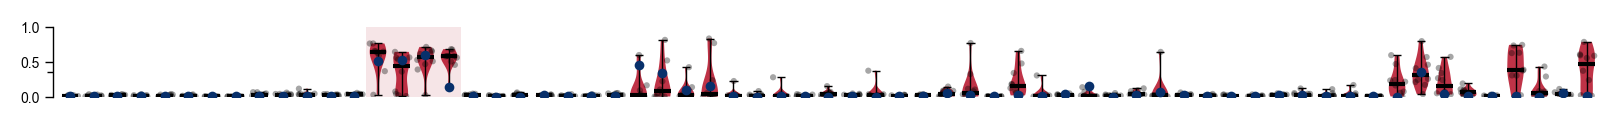

In [18]:
figs[0]

# d - task error histogram

In [82]:
average_min_lower_error = None
average_min_upper_error = None
normalize = False
fontsize=6

In [83]:
# task error on the original held out validation set, but with average end-point error
with ensemble.sort(
    "min", validation_subwrap=validation_subwrap, loss_name=validation_loss_fn
):
    task_error = ensemble.task_error(
        validation_subwrap=validation_subwrap,
        normalize=normalize,
        loss_name=validation_loss_fn,
        lower_error_bound=average_min_lower_error,
        upper_error_bound=average_min_upper_error
    )

In [344]:
np.mean(task_error.colors[: int(0.2 * len(task_error.values))], axis=0)

array([0.07535563, 0.356995  , 0.63057901, 1.        ])

In [351]:
np.mean(task_error.colors[: int(0.2 * len(task_error.values))])

0.5157324106113034

In [181]:
fontsize=6

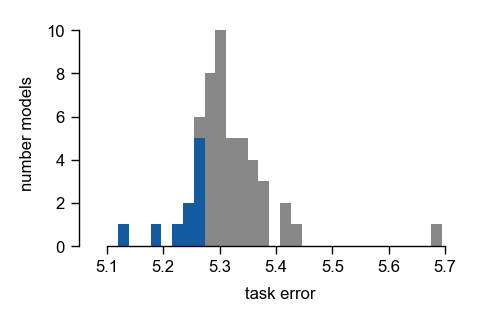

In [207]:
values, edges = np.histogram(task_error.values[: int(0.2 * len(task_error.values))])

width = (edges[1:] - edges[:-1])[0]


fig, ax = dvs.plots.init_plot(figsize=[2.6, 1.5], fontsize=fontsize)
bins = np.linspace(*dvs.plots.get_lims(task_error.values, 0.1), 35)

# plot entire histogram in grey
ax.hist(task_error.values, color=(0.53, 0.53, 0.53, 1.0), bins=bins)

# plot best ratio on top in whatever color
_, _, patches = ax.hist(
    task_error.values[: int(0.2 * len(task_error.values))], 
    color=np.mean(task_error.colors[: int(0.2 * len(task_error.values))], axis=0),
    bins=bins,
    label="20% best task-performing models"
)

# can color patches individually but the number of patches is not the number
# of task error values or colors and not sure why to illustrate it that way
# for i, p in enumerate(patches):
#     p.set_facecolor(
#         np.mean(task_error.colors[: int(0.2 * len(task_error.values))], axis=0)
#     )

ax.set_xlabel("task error", fontsize=fontsize)
ax.set_ylabel("number models", fontsize=fontsize)

dvs.plots.plt_utils.set_spine_tick_params(ax, spinewidth=0.5, tickwidth=0.5)
dvs.plots.plt_utils.trim_axis(ax)
# ax.vlines(0, *ax.get_ylim(), ls="-.")
# ax.vlines(1, *ax.get_ylim(), ls="-.")

# fig, cbar = dvs.plots.standalone_colorbar(cmap, norm, label='task error', figsize=[0.05, 0.75], fontsize=fontsize,
#                                           ticks=[0.0, 0.5, 1.0],
#                                           tick_width=0.25, tick_length=1)
# plt.savefig(DIR.parent / f"task_error_cbar_vertical.pdf", bbox_inches="tight", transparent=True)

# ax.legend(**dict(fontsize=5))

plt.savefig(directory / "task_error_histogram_panel_without_normalization.pdf", 
            bbox_inches="tight", transparent=True)

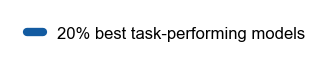

In [208]:
dvs.plots.plt_utils.standalone_legend(labels=["20% best task-performing models"],
                               colors=[np.mean(task_error.colors[: int(0.2 * len(task_error.values))], axis=0)],
                               lw=3.,
                               handlelength=1.0)
plt.savefig(directory / "task_error_histogram_panel_legend.pdf", 
            bbox_inches="tight", transparent=True)

# e - Accuracy of predictions and correlation to task error

In [15]:
# excluding best and worst model
outlier = ["flow/0092/000", "flow/0092/049"]

# including all models
outlier = []

In [16]:
model_items = [i for i, name in enumerate(ensemble.names) if name not in outlier]

In [17]:
average_min_lower_error = None
average_min_upper_error = None
normalize = False

In [28]:
# with ensemble.model_items(model_items):
with ensemble.sort(validation_subwrap=validation_subwrap, loss_name=validation_loss_fn):
    task_error = ensemble.task_error(validation_subwrap=validation_subwrap, 
                                     loss_name=validation_loss_fn,
                                     normalize=normalize,
                                     lower_error_bound=average_min_lower_error,
                                     upper_error_bound=average_min_upper_error
                                    )

In [30]:
task_error_values = task_error.values

In [86]:
def correlation(x, x_pred):
    """
    Args:
        x: n values, array like
        x_pred: m x n values
    
    Returns:
        array of correlations: n values
    """
    from scipy.stats import pearsonr

    _correlations = [pearsonr(x, _x_pred) for _x_pred in x_pred]
    correlations = [c.statistic for c in _correlations]
    pvalues = [c.pvalue for c in _correlations]
    return np.array(correlations), np.array(pvalues)

def linear_model(X, Y, alternative="less"):
    """Returns:
            array x: interpolated x data
            array y: interpolated y data
            rvalue
            pvalue
    """
    from scipy.stats import linregress
    
    linear_model = linregress(X, Y, alternative=alternative)
    x = np.linspace(*dvs.plots.get_lims(X, 0.1), 100)
    y = linear_model.slope * x + linear_model.intercept
    return x, y, linear_model.rvalue, linear_model.pvalue

In [83]:
from scipy.stats import linregress

## Motion tuning correlation

In [41]:
ensemble[0].tnn[flash_subwrap]

flashes/ - Last modified: October 03, 2023 16:27:37
├── _meta.yaml
└── network_states
    └── nodes
        ...

displaying: 2 directories, 1 files, 2 levels.

In [39]:
ensemble[0].tnn[movingedge_subwrap].spec

Namespace(
  widths = [80],
  offsets = [-10, 11],
  intensities = [0, 1],
  speeds = [2.4, 4.8, 9.7, 13, 19, 25],
  height = 80,
  bar_loc_horizontal = 0.0,
  shuffle_offsets = False,
  post_pad_mode = 'continue',
  t_pre = 1.0,
  t_post = 1.0,
  dt = 0.005,
  angles = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
)

In [22]:
dsi_task_error_correlation = ensemble.dsi_task_error_correlation(
    validation_subwrap, validation_loss_fn, movingedge_subwrap, aggregate="median"
)

In [9]:
movingedge_subwrap

'original_validation_v2/epe_based/moving_edges'

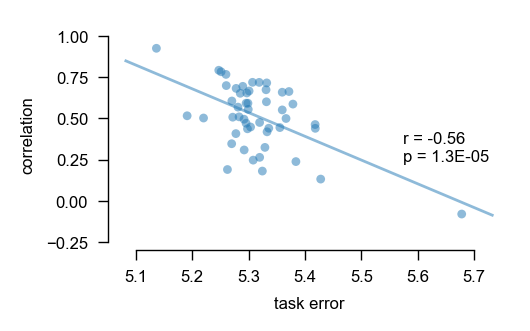

In [8]:
fig, ax = dsi_task_error_correlation.plot(figsize=[2.6, 1], fontsize=6)

# fig, ax = dvs.plots.init_plot(figsize=[2.6, 1], fontsize=6)

# ax.scatter(task_error_values, corr_dsi, s=12, edgecolor="none", alpha=0.5, c=colors)
# ax.plot(x_dsi, y_dsi, alpha=0.5)
# ax.annotate(
#     f"r = {r_dsi:.2G}\np = {p_dsi:.2G}",
#     (x_dsi[75], y_dsi[75] + 0.1),
#     fontsize=6,
# )
ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-0.3, 1.1)
dvs.plots.plt_utils.trim_axis(ax)

## Flash response correlation

In [19]:
fri_task_error_correlation = ensemble.fri_task_error_correlation(
    validation_subwrap, validation_loss_fn, flash_subwrap
)

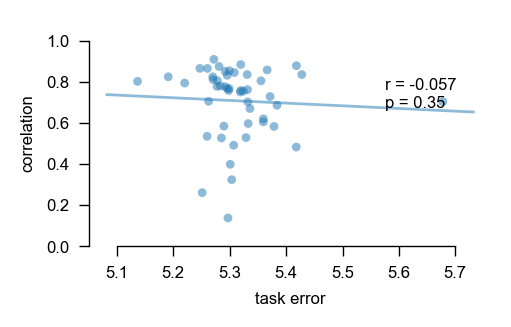

In [156]:
fig, ax = fri_task_error_correlation.plot(figsize=[2.6, 1], fontsize=6)

# fig, ax = dvs.plots.init_plot(figsize=[2.6, 1], fontsize=6)

# ax.scatter(task_error_values, corr_dsi, s=12, edgecolor="none", alpha=0.5, c=colors)
# ax.plot(x_dsi, y_dsi, alpha=0.5)
# ax.annotate(
#     f"r = {r_dsi:.2G}\np = {p_dsi:.2G}",
#     (x_dsi[75], y_dsi[75] + 0.1),
#     fontsize=6,
# )
ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-0.0, 1.1)
dvs.plots.plt_utils.trim_axis(ax)

## Motion contrast preference correlation

In [46]:
motion_tuning = ["T4a", "T4b", "T4c", "T4d", "T5a", "T5b", "T5c", "T5d",]

with ensemble.sort(validation_subwrap=validation_subwrap, loss_name=validation_loss_fn):
    dsis_on, node_types = ensemble.dsis(subwrap=movingedge_subwrap, intensity=1)

with ensemble.sort(validation_subwrap=validation_subwrap, loss_name=validation_loss_fn):
    dsis_off, node_types = ensemble.dsis(subwrap=movingedge_subwrap, intensity=0)

In [98]:
# only true for moving edges according to Eyal
on_groundtruth = [1, 1, 1, 1, 0, 0, 0, 0]
off_groundtruth = [0, 0, 0, 0, 1, 1, 1, 1]

groundtruth = [*on_groundtruth, *off_groundtruth]

In [ ]:
known_cell_type_index = np.array([np.where(nt == node_types)[0].item() for i, nt in enumerate(motion_tuning)])

In [99]:
dsis_on_off = np.concatenate((dsis_on[:, known_cell_type_index], dsis_off[:, known_cell_type_index]), axis=1)
corr_on_off_dsi, corr_on_off_dsi_pr = correlation(groundtruth, dsis_on_off)

(<Figure size 1000x200 with 1 Axes>,
 <AxesSubplot:>,
 [(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0),
  (0.0, 0.26666666666666666, 0.10588235294117647, 1.0)])

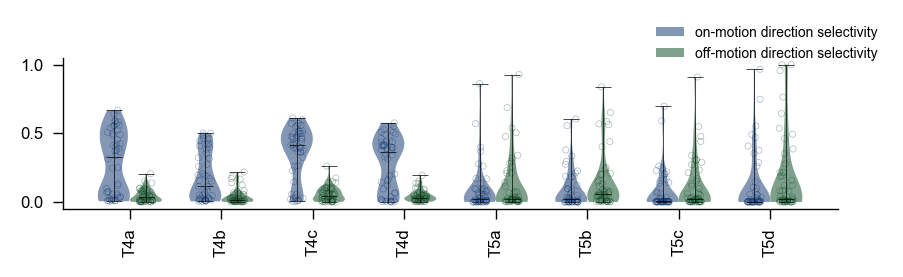

In [48]:
dvs.plots.violin_groups_v3(np.transpose(dsis_on_off, (1, 0)).reshape(2,  8, 50),
                           xticklabels=[*motion_tuning],
                           colors=[plt.cm.Blues(256), plt.cm.Greens(256)], 
                           scatter=True,
                           figsize=[5, 1],
                           legend=["on-motion direction selectivity", "off-motion direction selectivity"],
                      )

In [100]:
X = task_error_values
Y = corr_on_off_dsi
x_on_off_dsi, y_on_off_dsi, r_on_off_dsi, p_on_off_dsi = linear_model(X, Y)

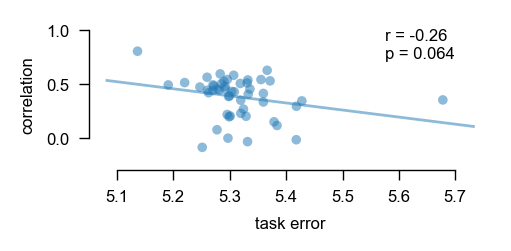

In [102]:
fig, ax = dvs.plots.init_plot(figsize=[2.6, 1], fontsize=6)

ax.scatter(task_error_values, corr_on_off_dsi, s=12, edgecolor="none", alpha=0.5, c=colors)
ax.plot(x_on_off_dsi, y_on_off_dsi, alpha=0.5)
ax.annotate(
    f"r = {r_on_off_dsi:.2G}\np = {p_on_off_dsi:.2G}",
    (x[75], y[75] + 0.1),
    fontsize=6,
)
ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-0.3, 1.1)
dvs.plots.plt_utils.trim_axis(ax)

## Combined plot

In [42]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import dvs
from dvs import plots
from dvs.plots import plt_utils
from dvs.utils import notebook_utils
%load_ext autoreload
%autoreload 2
mpl.rcParams['figure.dpi'] = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
green = "#1b9e77"
red = "#d95f02"
purple = "#7570b3"

fri_hex = purple #"#aa8076"
dsi_hex = red #"#aa8076"

In [44]:
from matplotlib.colors import hex2color

In [45]:
color_dsi = (*hex2color(dsi_hex), 1.0)
color_fri = (*hex2color(fri_hex), 1.0)
color_on_off_dsi = (*hex2color(green), 1.0)

colors = np.array(((0.5, 0.5, 0.5, 1), ) * len(ensemble))

colors_dsi = colors.copy()
colors_fri = colors.copy()
colors_on_off_dsi = colors.copy()

colors_dsi[model_items] = np.array(color_dsi)
colors_fri[model_items] = np.array(color_fri)
colors_on_off_dsi[model_items] = np.array(color_on_off_dsi)

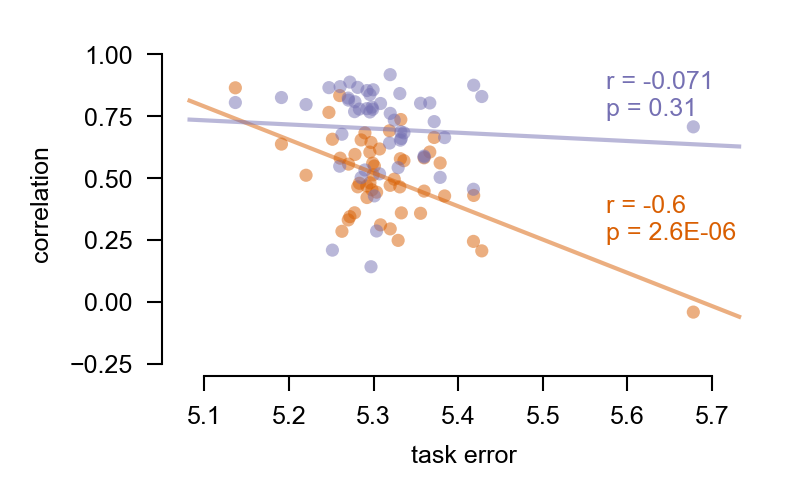

In [47]:
fig, ax = dsi_task_error_correlation.plot(
    figsize=[2.6, 1], fontsize=6, s=10, edgecolor="none", alpha=0.5, scatter_colors=colors_dsi,
    color=color_dsi
)

fri_task_error_correlation.plot(fig=fig, ax=ax, scatter_colors=colors_fri, color=color_fri)

ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-0.3, 1.1)
dvs.plots.plt_utils.trim_axis(ax)

plt.savefig(
    directory / "task_error_tuning_correlation.pdf",
    bbox_inches="tight",
    transparent=True,
)

array([5.13655711, 5.1910432 , 5.22012672, 5.24715637, 5.2604324 ,
       5.269998  , 5.25988503, 5.27035007, 5.30351718, 5.30087524,
       5.29887018, 5.299408  , 5.27191578, 5.28119569, 5.2779208 ,
       5.29688033, 5.29801039, 5.25127261, 5.33273918, 5.32895969,
       5.29551571, 5.33160512, 5.31953547, 5.30697792, 5.29188206,
       5.31876665, 5.28969613, 5.33581834, 5.33213666, 5.28314262,
       5.29563644, 5.26250649, 5.2921518 , 5.31962388, 5.32438865,
       5.33095436, 5.30815758, 5.36637067, 5.38389174, 5.27748741,
       5.35965757, 5.28523434, 5.35544482, 5.35966653, 5.41826287,
       5.37860596, 5.3715731 , 5.41797793, 5.42784129, 5.67785169])

array([ 0.86505527,  0.63761619,  0.5117755 ,  0.76572032,  0.58080929,
        0.33131009,  0.83373584,  0.55679764,  0.44337593,  0.54923037,
        0.56044489,  0.51332556,  0.34454815,  0.46500871,  0.59584013,
        0.64434262,  0.45302851,  0.6572791 ,  0.35973156,  0.24862646,
        0.60527193,  0.57865505,  0.4711013 ,  0.61798498,  0.4685494 ,
        0.69145251,  0.68273959,  0.57060644,  0.73688951,  0.47933102,
        0.48122947,  0.28533114,  0.42175692,  0.29510013,  0.49598124,
        0.46468315,  0.31137356,  0.6056624 ,  0.42818113,  0.36005307,
        0.58218989,  0.65448924,  0.35801845,  0.44773258,  0.43018837,
        0.5614269 ,  0.66443411,  0.2445161 ,  0.2062551 , -0.04118038])

In [55]:
import numpy as np
from scipy import stats

# Example data
x = dsi_task_error_correlation.task_error
y = dsi_task_error_correlation.metric_correlation

# Perform linear regression
result = stats.linregress(x, y)

# Extract relevant statistics
slope = result.slope
intercept = result.intercept
r_value = result.rvalue
p_value = result.pvalue
stderr = result.stderr
intercept_stderr = result.intercept_stderr

# Degrees of freedom
df = len(x) - 2

# Confidence intervals for the slope
alpha = 0.05  # significance level
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(alpha, df)
ci_slope_lower = slope - ts * stderr
ci_slope_upper = slope + ts * stderr

# Confidence intervals for the intercept
ci_intercept_lower = intercept - ts * intercept_stderr
ci_intercept_upper = intercept + ts * intercept_stderr

# Effect size can be considered as the slope here

# Print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error of the slope: {stderr}")
print(f"Standard error of the intercept: {intercept_stderr}")
print(f"Degrees of freedom: {df}")
print(f"95% confidence interval for slope: ({ci_slope_lower}, {ci_slope_upper})")
print(f"95% confidence interval for intercept: ({ci_intercept_lower}, {ci_intercept_upper})")


Slope: -1.3440612423433957
Intercept: 7.644309578592681
R-value: -0.595354303395621
P-value: 5.105293692858476e-06
Standard error of the slope: 0.26181165685267216
Standard error of the intercept: 1.391484718401932
Degrees of freedom: 48
95% confidence interval for slope: (-1.8704688587960383, -0.8176536258907532)
95% confidence interval for intercept: (4.846542043144759, 10.442077114040604)


In [73]:
import numpy as np
from scipy import stats

# Example data
x = dsi_task_error_correlation.task_error
y = dsi_task_error_correlation.metric_correlation

# Perform linear regression
result = stats.linregress(x, y)

# Extract relevant statistics
slope = result.slope
intercept = result.intercept
r_value = result.rvalue
p_value = result.pvalue
stderr = result.stderr
intercept_stderr = result.intercept_stderr

# Degrees of freedom
df = len(x) - 2

# Confidence intervals for the slope
alpha = 0.05  # significance level
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(alpha, df)
ci_slope_lower = slope - ts * stderr
ci_slope_upper = slope + ts * stderr

# Confidence intervals for the intercept
ci_intercept_lower = intercept - ts * intercept_stderr
ci_intercept_upper = intercept + ts * intercept_stderr

# Test statistic (t-value)
t_value = np.sqrt((slope)**2 / stderr**2)

# Print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error of the slope: {stderr}")
print(f"Standard error of the intercept: {intercept_stderr}")
print(f"Degrees of freedom: {df}")
print(f"95% confidence interval for slope: ({ci_slope_lower}, {ci_slope_upper})")
print(f"95% confidence interval for intercept: ({ci_intercept_lower}, {ci_intercept_upper})")
print(f"Test statistic (t-value): {t_value}")


Slope: -1.3440612423433957
Intercept: 7.644309578592681
R-value: -0.595354303395621
P-value: 5.105293692858476e-06
Standard error of the slope: 0.26181165685267216
Standard error of the intercept: 1.391484718401932
Degrees of freedom: 48
95% confidence interval for slope: (-1.8704688587960383, -0.8176536258907532)
95% confidence interval for intercept: (4.846542043144759, 10.442077114040604)
Test statistic (t-value): 5.1336951856950055


In [72]:
x, y

(array([5.13655711, 5.1910432 , 5.22012672, 5.24715637, 5.2604324 ,
        5.269998  , 5.25988503, 5.27035007, 5.30351718, 5.30087524,
        5.29887018, 5.299408  , 5.27191578, 5.28119569, 5.2779208 ,
        5.29688033, 5.29801039, 5.25127261, 5.33273918, 5.32895969,
        5.29551571, 5.33160512, 5.31953547, 5.30697792, 5.29188206,
        5.31876665, 5.28969613, 5.33581834, 5.33213666, 5.28314262,
        5.29563644, 5.26250649, 5.2921518 , 5.31962388, 5.32438865,
        5.33095436, 5.30815758, 5.36637067, 5.38389174, 5.27748741,
        5.35965757, 5.28523434, 5.35544482, 5.35966653, 5.41826287,
        5.37860596, 5.3715731 , 5.41797793, 5.42784129, 5.67785169]),
 array([ 0.86505527,  0.63761619,  0.5117755 ,  0.76572032,  0.58080929,
         0.33131009,  0.83373584,  0.55679764,  0.44337593,  0.54923037,
         0.56044489,  0.51332556,  0.34454815,  0.46500871,  0.59584013,
         0.64434262,  0.45302851,  0.6572791 ,  0.35973156,  0.24862646,
         0.60527193,  0.57

In [75]:
s = stats.pearsonr(x, y, alternative='less', method=None)

Confidence interval of r
https://github.com/scipy/scipy/blob/7dcd8c59933524986923cde8e9126f5fc2e6b30b/scipy/stats/_stats_py.py#L4343C1-L4379C49

In [82]:
s.confidence_interval??

In [81]:
s.confidence_interval()

ConfidenceInterval(low=-1.0, high=-0.7286513716499838)

In [74]:
import numpy as np
from scipy.stats import norm

# Sample size and Pearson correlation coefficient
n = 50
r = -0.595354303395621

# Fisher transformation
z = np.arctanh(r)  # equivalent to (1/2) * ln((1 + r) / (1 - r))
se_z = 1 / np.sqrt(n - 3)

# Critical value for 95% confidence interval
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

# Confidence interval for z
z_lower = z - z_critical * se_z
z_upper = z + z_critical * se_z

# Back-transform to obtain the confidence interval for r
r_lower = np.tanh(z_lower)
r_upper = np.tanh(z_upper)

# Print results
print(f"Pearson correlation coefficient (r): {r}")
print(f"95% confidence interval for r: ({r_lower}, {r_upper})")


Pearson correlation coefficient (r): -0.595354303395621
95% confidence interval for r: (-0.749498495027708, -0.3799742047850246)


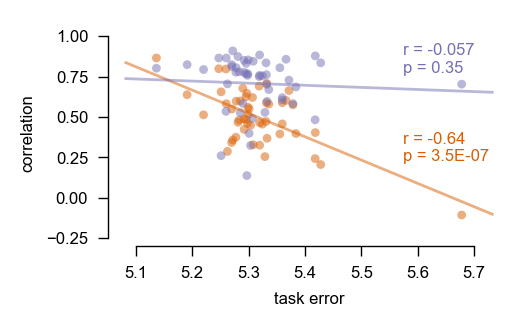

In [167]:
fig, ax = dsi_task_error_correlation.plot(
    figsize=[2.6, 1], fontsize=6, s=10, edgecolor="none", alpha=0.5, scatter_colors=colors_dsi,
    color=color_dsi
)

fri_task_error_correlation.plot(fig=fig, ax=ax, scatter_colors=colors_fri, color=color_fri)

ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-0.3, 1.1)
dvs.plots.plt_utils.trim_axis(ax)

plt.savefig(
    directory / "task_error_tuning_correlation.pdf",
    bbox_inches="tight",
    transparent=True,
)

In [172]:
np.percentile(dsi_task_error_correlation.task_error, [1, 99])

array([5.1632553 , 5.55534659])

In [173]:
directory

PosixPath('/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/data/figures/manuscript/figure_02_simple_stimuli_responses/assets/links')

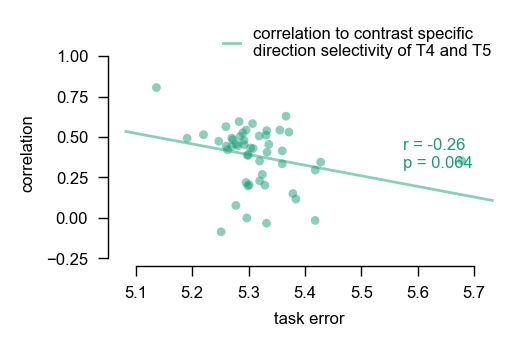

In [216]:
fig, ax = dvs.plots.init_plot(figsize=[2.6, 1.5], fontsize=6)

# ax.scatter(task_error_values, corr_dsi , s=10, edgecolor="none", alpha=0.5, c=colors_dsi)
# ax.scatter(task_error_values, corr_fri , s=10, edgecolor="none", alpha=0.5, c=colors_fri)
ax.scatter(task_error_values, corr_on_off_dsi, s=10, edgecolor="none", alpha=0.5, c=colors_on_off_dsi)


# ax.plot(x_fri, y_fri, alpha=0.5, color=color_fri, label="correlation to flash response index")
# ax.annotate(
#     f"r = {r_fri:.2G}\np = {p_fri:.2G}",
#     (x_fri[75], y_fri[75] + 0.1),
#     fontsize=6,
#     color=color_fri
# )

# ax.plot(x_dsi, y_dsi, alpha=0.5, color=color_dsi, label="correlation to direction selectivity")
# ax.annotate(
#     f"r = {r_dsi:.2G}\np = {p_dsi:.2G}",
#     (x_dsi[75], y_dsi[75] + 0.1),
#     fontsize=6,
#     color=color_dsi
# )


ax.plot(x_on_off_dsi, y_on_off_dsi, alpha=0.5, color=color_on_off_dsi, label="correlation to contrast specific \ndirection selectivity of T4 and T5")
ax.annotate(
    f"r = {r_on_off_dsi:.2G}\np = {p_on_off_dsi:.2G}",
    (x_on_off_dsi[75], y_on_off_dsi[75] + 0.1),
    fontsize=6,
    color=color_on_off_dsi
)

ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-0.3, 1.1)
ax.legend(fontsize=6,
         handlelength=1,
         bbox_to_anchor=(0.25, 0.85, 0., 0.))

dvs.plots.plt_utils.trim_axis(ax)

# plt.savefig(
#     directory / "task_error_tuning_correlation.pdf",
#     bbox_inches="tight",
#     transparent=True,
# )

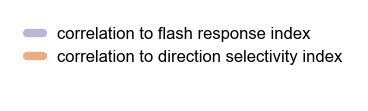

In [211]:
dvs.plots.plt_utils.standalone_legend(
    labels=[
        "correlation to flash response index",
        "correlation to direction selectivity index",
    ],
    colors=[color_fri, color_dsi],
    lw=3,
    handlelength=1.0,
    alpha=0.5,
)

plt.savefig(
    directory / "task_error_tuning_correlation_legend.pdf",
    bbox_inches="tight",
    transparent=True,
)

## correlation task error to tuning curves

In [115]:
from pathlib import Path
import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import dvs
from dvs import plots
from dvs.plots import plt_utils
from dvs.utils import notebook_utils
%load_ext autoreload
%autoreload 2
mpl.rcParams['figure.dpi'] = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"

movingedge_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/moving_edges"
flash_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/flashes"

naturalistic_responses_wrap = "naturalistic_responses_v3"
naturalistic_responses_wrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/{naturalistic_responses_wrap}"
)

In [117]:
from dvs.analysis.response_views.moving_edge import correlation_to_known

In [116]:
ensemble = dvs.analysis.EnsembleViews("flow/0092")

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
tuning_corr_w_contrast = correlation_to_known(
                    ensemble,
                    movingedge_subwrap,
                    naturalistic_responses_wrap,
                    mode="independent",
                    aggregate_stimuli="max",
                    respect_contrast=True,outlier_mask = np.zeros(len(ensemble)).astype(bool)

In [120]:
outlier_mask = np.zeros(len(ensemble)).astype(bool)

In [121]:
outlier_mask[0] = True
outlier_mask[-1] = True

In [122]:
outlier_mask

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [124]:
t4_corrs = np.mean(np.array([v for k, v in tuning_corr_w_contrast.items() if "T4" in k]).T, axis=1)

In [125]:
t5_corrs = np.mean(np.array([v for k, v in tuning_corr_w_contrast.items() if "T5" in k]).T, axis=1)

In [126]:
task_error = ensemble.task_error(validation_subwrap=validation_subwrap, loss_name=validation_loss_fn)

In [127]:
from dvs.analysis.simple_correlation import plot_with_linear_model, linear_model

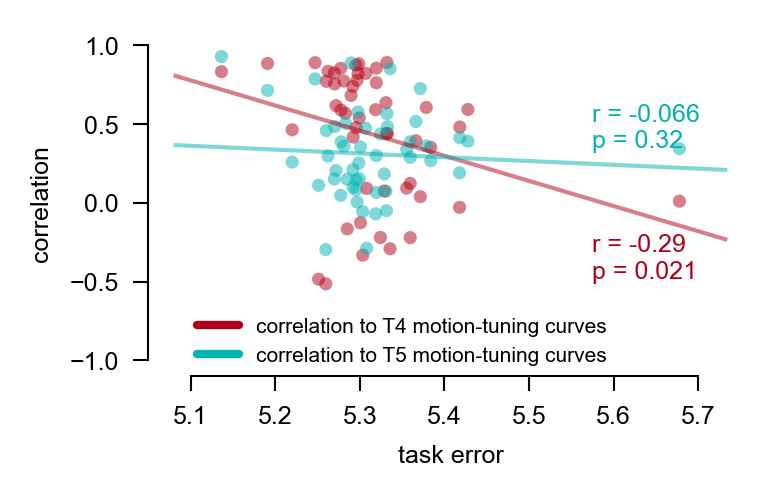

In [162]:
t4_lm = linear_model(
    task_error.values, t4_corrs, alternative="less"
)  # , outlier_mask=outlier_mask)
fig, ax = plot_with_linear_model(
    task_error.values,
    t4_corrs,
    lin_model=t4_lm,
    figsize=[2.6, 1],
    fontsize=6,
    s=10,
    edgecolor="none",
    alpha=0.5,
    annotation_y_offset=-0.5,
    color=dvs.utils.color_utils.ON,
    scatter_colors=dvs.utils.color_utils.ON,
)  # , outlier_mask=outlier_mask)

t5_lm = linear_model(
    task_error.values, t5_corrs, alternative="less"
)  # , outlier_mask=outlier_mask)
plot_with_linear_model(
    task_error.values,
    t5_corrs,
    lin_model=t5_lm,
    fig=fig,
    ax=ax,
    color=dvs.utils.color_utils.OFF,
    scatter_colors=dvs.utils.color_utils.OFF,
)  # , outlier_mask=outlier_mask)

ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-1.1, 1.1)
dvs.plots.plt_utils.trim_axis(ax)

dvs.plots.add_legend(
    ax,
    labels=(
        "correlation to T4 motion-tuning curves",
        "correlation to T5 motion-tuning curves",
    ),
    colors=(dvs.utils.color_utils.ON, dvs.utils.color_utils.OFF),
    fontsize=5,
    alpha=1,
    lw=2,
    labelspacing=0.5,
    handlelength=2.0,
    bbox_to_anchor=(0.05, 0.1),
    edgecolor=None,
    edgewidth=None,
    loc="center left",
    override_alpha=False,
    ncol=1,
)

plt.savefig(
    directory / "task_error_tuning_curve_correlation_t4t5.pdf",
    bbox_inches="tight",
    transparent=True,
)

In [163]:
directory

PosixPath('/groups/turaga/home/lappalainenj/FlyVis/dvs-sim/data/figures/manuscript/figure_02_simple_stimuli_responses/assets/links')

In [ ]:
fig, ax = dsi_task_error_correlation.plot(
    figsize=[2.6, 1], fontsize=6, s=10, edgecolor="none", alpha=0.5, scatter_colors=colors_dsi,
    color=color_dsi
)

fri_task_error_correlation.plot(fig=fig, ax=ax, scatter_colors=colors_fri, color=color_fri)

ax.set_xlabel("task error", fontsize=6)
ax.set_ylabel("correlation", fontsize=6)
ax.set_ylim(-0.3, 1.1)
dvs.plots.plt_utils.trim_axis(ax)

plt.savefig(
    directory / "task_error_tuning_correlation.pdf",
    bbox_inches="tight",
    transparent=True,
)